EDA
- EDA stands for Exploratory Data Analysis
- It's a method of analyzing and summarizing the data so we can make observations and assumptions.
- It's also essential for finding issues in the data (DQA : Data Quality Assurance)
- Data exploration includes finding: anomalies, patterns, inspect data quality, test hypotheses and assumptions, etc...
- EDA Techniques:
    - Descriptive Statistics:
        - Measures of Central Tendency
        - Measures of Dispersion
        - Measures of Shape
        - Measures of Relationship
    - Non-Graphical Analysis:
        - Data Aggregation
        - Looking for missing values
        - Examples:
            - `pivot_table()`
            - `groupby()` and `agg()`
            - `crosstab()`
    - Graphical Analysis (Data Visualization)
        - Bar plots
        - Histograms
        - Scatter plots
        - Pie charts
        - Heatmaps

In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('/Users/bassel_instructor/Documents/Datasets/HousePrices.csv')
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [3]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261
std,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


**Observations**
- 75% of the houses have a price of $655,000 and below
- On average we have around 3 bedrooms and 2 bathrooms
- Square feet of living space varies widely, but square feet of lot space varies even more widely (based on standard deviation)
- Having a binary indicator for waterfront, we can see that the average is very low (sum of all 1s). Therefore, the majority of the houses don't have a water front
- Average living square footage is 2139
- On Average 75% of the houses have 3 or more bedrooms. 50% of the houses has exactly 3 bedrooms
- The median (50th perc) is $460K and the mean is $550K. Therefore, the distribution is positively skewed.
- House built year ranges from 1900 to 2014

Get the average price, bedrooms, sqft_living, and floors by city

In [4]:
df.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'street', 'city',
       'statezip', 'country'],
      dtype='object')

In [5]:
df.groupby(['city'])[['price', 'bedrooms', 'sqft_living', 'floors']].mean()

,price,bedrooms,sqft_living,floors
city,,,,
Algona,2.072880e+05,3.200000,1608.600000,1.400000
Auburn,2.993404e+05,3.420455,2019.579545,1.448864
Beaux Arts Village,7.450000e+05,3.000000,1490.000000,1.000000
Bellevue,8.471807e+05,3.804196,2694.527972,1.398601
Black Diamond,3.396056e+05,3.222222,1863.333333,1.388889
Bothell,4.814419e+05,3.606061,2319.393939,1.500000
Burien,3.489472e+05,3.337838,1815.337838,1.209459
Carnation,5.087520e+05,3.090909,2392.454545,1.522727
Clyde Hill,1.321945e+06,4.181818,3620.909091,1.181818


In [6]:
df['price_per_sqrft'] = df['price']/df['sqft_living']
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country,price_per_sqrft
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA,233.582090
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA,653.150685
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA,177.202073
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA,210.000000
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA,283.505155


In [7]:
df.groupby(['city'])[['price', 'price_per_sqrft','bedrooms', 'sqft_living', 'floors']].mean()

,price,price_per_sqrft,bedrooms,sqft_living,floors
city,,,,,
Algona,2.072880e+05,129.127871,3.200000,1608.600000,1.400000
Auburn,2.993404e+05,151.345274,3.420455,2019.579545,1.448864
Beaux Arts Village,7.450000e+05,500.000000,3.000000,1490.000000,1.000000
Bellevue,8.471807e+05,318.094865,3.804196,2694.527972,1.398601
Black Diamond,3.396056e+05,224.437981,3.222222,1863.333333,1.388889
Bothell,4.814419e+05,213.743293,3.606061,2319.393939,1.500000
Burien,3.489472e+05,198.257612,3.337838,1815.337838,1.209459
Carnation,5.087520e+05,229.049204,3.090909,2392.454545,1.522727
Clyde Hill,1.321945e+06,351.540603,4.181818,3620.909091,1.181818


In [8]:
df['state'] = df['statezip'].str[:2]
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country,price_per_sqrft,state
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA,233.582090,WA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA,653.150685,WA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA,177.202073,WA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA,210.000000,WA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA,283.505155,WA


## Data Visualization

![choosing the right chart](https://www.labnol.org/images/2008/data-chart-type.png)

Visualization Libraries:
- Builtin visualization in `pandas`
- Foundational `matplotlib`
- Advanced:
    - `seaborn` for statistical analysis 
    - `plotly` for interactive visualization like Tableau and PowerBI
    - `Bokeh` some interactivity with statistical analysis

`pip install matplotlib`

In [9]:
import matplotlib.pyplot as plt

In [10]:
# generate dummy data
x = np.linspace(0, 10, 100)
y = np.sin(x) 

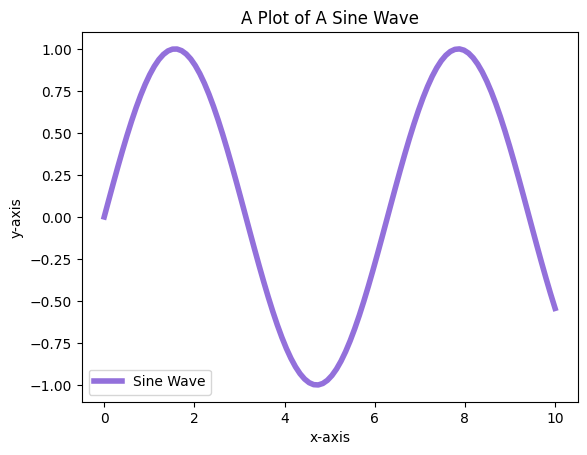

In [11]:
# plot object
plt.plot(x,y, label='Sine Wave', color='mediumpurple', linewidth=4)

#formatting of the plotting area
#x axis title
plt.xlabel('x-axis')
# y axis title
plt.ylabel('y-axis')
#add a title
plt.title('A Plot of A Sine Wave')
#adda a legend
plt.legend()

For color names: https://matplotlib.org/stable/gallery/color/named_colors.html

matplotlib also has themes you can find here: https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html 

In [12]:
plt.style.use('ggplot') #you only need to run this once

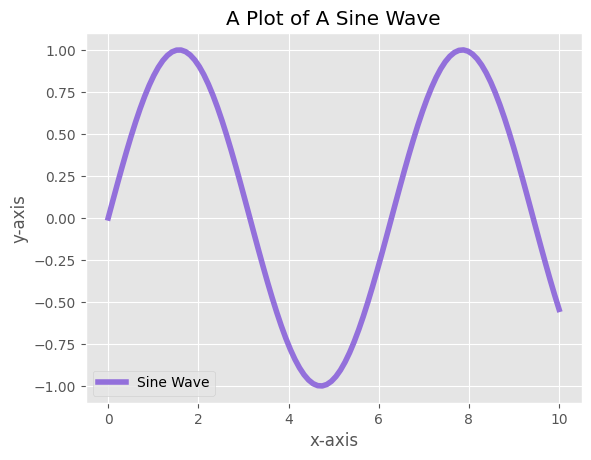

In [13]:
# plot object
plt.plot(x,y, label='Sine Wave', color='mediumpurple', linewidth=4)

#formatting of the plotting area
#x axis title
plt.xlabel('x-axis')
# y axis title
plt.ylabel('y-axis')
#add a title
plt.title('A Plot of A Sine Wave')
#adda a legend
plt.legend()

Using the same plot for 2 or more lines

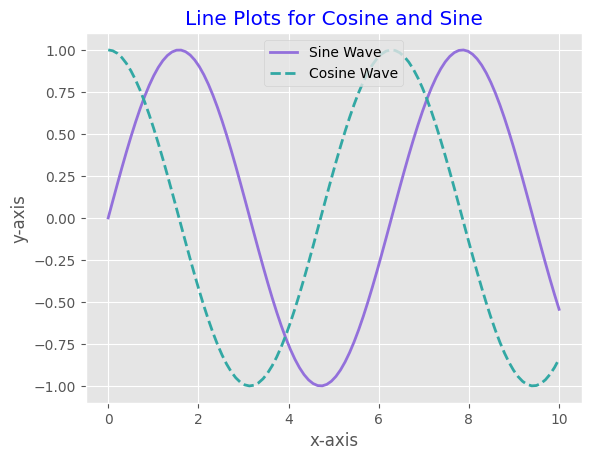

In [14]:
# generate dummy data
x = np.linspace(0, 10, 100)
y1 = np.sin(x) 
y2 = np.cos(x)

# plot object
# first line
plt.plot(x,y1, label='Sine Wave', color='mediumpurple', linewidth=2)
#second line
plt.plot(x,y2, label='Cosine Wave', color='#32a8a4', linewidth=2, linestyle='--')

#formatting of the plotting area
plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.title('Line Plots for Cosine and Sine', color='blue')
plt.legend(loc='upper center')

(-2.0, 2.0)

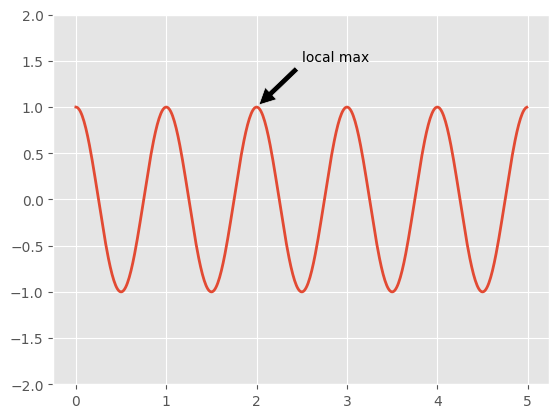

In [15]:
fig, ax = plt.subplots()

t = np.arange(0.0, 5.0, 0.01)
s = np.cos(2*np.pi*t)
line, = ax.plot(t, s, lw=2)

ax.annotate('local max', xy=(2, 1), xytext=(2.5, 1.5),
            arrowprops=dict(facecolor='black', shrink=0.05),
            )
ax.set_ylim(-2, 2)

### Bar Plots

<BarContainer object of 3 artists>

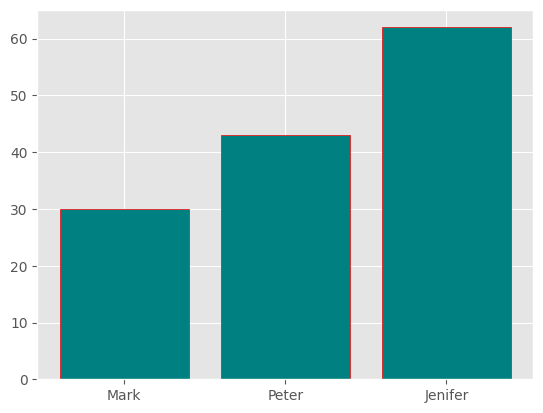

In [16]:
salesperson = ['Mark', 'Peter', 'Jenifer']
sales = [30,43,62]

plt.bar(salesperson, sales, color='teal', edgecolor='red')

## EDA Exercise - Analyzing Data and Exploring Different Chart Types for Real Estate Data 

There are so many variables that impact the price of a house. With dynamic parameters in the residential real state business, it is always important to reach a reasonable price for better business opportunities. As a part of the analytics team in a real state company, you have to come up with the variables that are impacting the price of the house through analyzing and visualizing the data.

In [17]:
df = pd.read_csv('/Users/bassel_instructor/Documents/Datasets/housing_data.csv',
                 index_col=0 #use the first column as the index
                 )
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,SC60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,No,No,No,0,Feb,2008,WD,Normal,208500
1,SC20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,No,No,No,0,May,2007,WD,Normal,181500
2,SC60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,No,No,No,0,Sep,2008,WD,Normal,223500
3,SC70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,No,No,No,0,Feb,2006,WD,Abnorml,140000
4,SC60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,No,No,No,0,Dec,2008,WD,Normal,250000


In [18]:
df.shape

(1460, 80)

In [19]:
df.sample(15)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
637,SC190,RM,50.0,6000,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,No,No,No,0,Nov,2009,WD,Normal,93000
1326,SC30,RH,70.0,4270,Pave,NaN,Reg,Bnk,AllPub,Inside,...,0,No,No,No,0,May,2007,WD,Normal,79000
55,SC20,RL,100.0,10175,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,No,No,No,0,Jul,2008,WD,Normal,180500
932,SC20,RL,84.0,11670,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,No,No,No,0,Mar,2007,WD,Normal,320000
261,SC60,RL,69.0,9588,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,No,No,No,0,Nov,2007,New,Partial,276000
1334,SC160,RM,24.0,2368,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,No,No,No,0,May,2009,WD,Normal,125000
937,SC60,RL,75.0,9675,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,No,No,No,0,Feb,2009,WD,Normal,253000
1324,SC20,RL,75.0,9986,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,No,No,No,0,Feb,2007,New,Partial,147000
825,SC20,RL,114.0,14803,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,No,No,No,0,Jun,2008,New,Partial,385000
54,SC80,RL,60.0,7134,Pave,NaN,Reg,Bnk,AllPub,Inside,...,0,No,MnPrv,No,0,Feb,2007,WD,Normal,130000


Top 10 neighborhoods by average price

<Axes: ylabel='Neighborhood'>

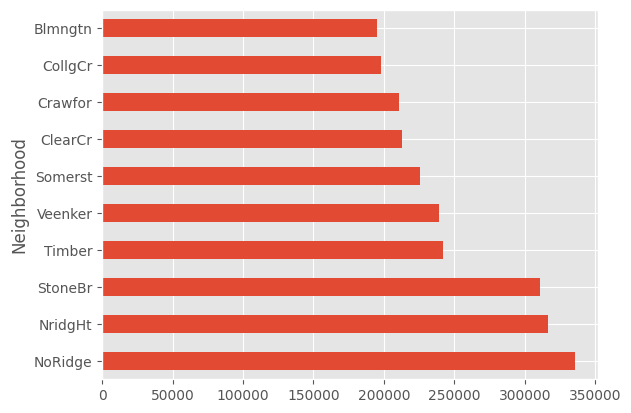

In [20]:
df.groupby(['Neighborhood'])['SalePrice'].mean().nlargest(10).plot(kind='barh')

In [21]:
df.dtypes

MSSubClass        object
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
                  ...   
MoSold            object
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 80, dtype: object

Split the column list into categorical and numerical columns

In [22]:
cat_features_list = df.select_dtypes(include='object').columns
cat_features_list

Index(['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC',
       'Fence', 'MiscFeature', 'MoSold', 'SaleType', 'SaleCondition'],
      dtype='object')

In [23]:
len(cat_features_list)

45

In [24]:
num_features_list = df.select_dtypes(include=np.number).columns 
num_features_list

Index(['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'YrSold', 'SalePrice'],
      dtype='object')

> Be aware of categorical columns that have numerical values. e.g. OverallQual

### About Seaborn
- `pip install seaborn`
- Powerful data visualization library that is built on top of `matplotlib`
- It is rich with statistical graphs, such as histograms, regression, heatmaps, etc...
- It works very well with `pandas`

In [25]:
pip show seaborn

Name: seaborn
Version: 0.13.2
Summary: Statistical data visualization
Home-page: 
Author: 
Author-email: Michael Waskom <mwaskom@gmail.com>
License: 
Location: /Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages
Requires: matplotlib, numpy, pandas
Required-by: ambivalent
Note: you may need to restart the kernel to use updated packages.


`pip install seaborn==0.12.2`

In [26]:
import seaborn as sns

### Univariate Analysis
- "uni" means single 
- analyzing a single column/feature/variable 
- It can be done on numerical or categorical variables
- Chart Types:
    - Histogram
    - KDE (Bell Curve or density plot)
    - Box and Whisker
    - Swarm
    - Pie chart

#### Categorical Histograms

<Axes: xlabel='BldgType', ylabel='Count'>

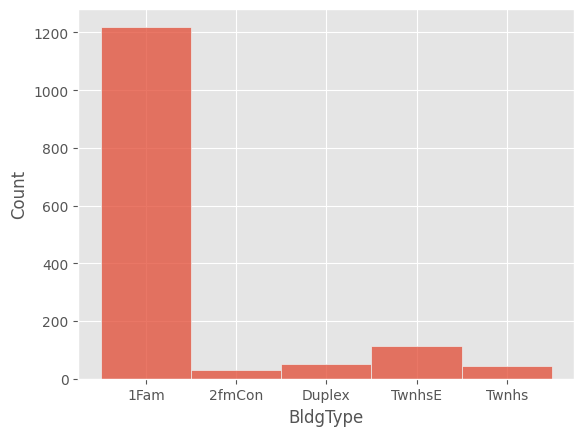

In [27]:
sns.histplot(data=df, x='BldgType')

**Observation**
- 1 family is the most common building type
- 2 family is the least common

#### Numerical Columns

<Axes: xlabel='SalePrice', ylabel='Count'>

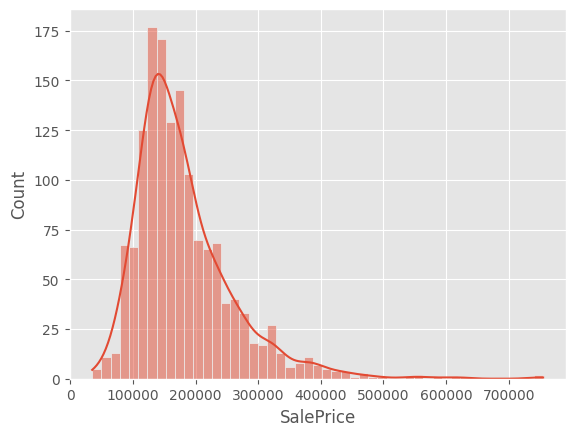

In [28]:
sns.histplot(data=df, x='SalePrice', kde=True) #kde is kernel density estimator 

**Observations**
- The distribution of the SalePrice is positively skewed. Therefore, we have extreme values on the right side (outliers) 
- Outliers at the max price is affecting mean
- Mean > Median

<Axes: xlabel='SalePrice', ylabel='Count'>

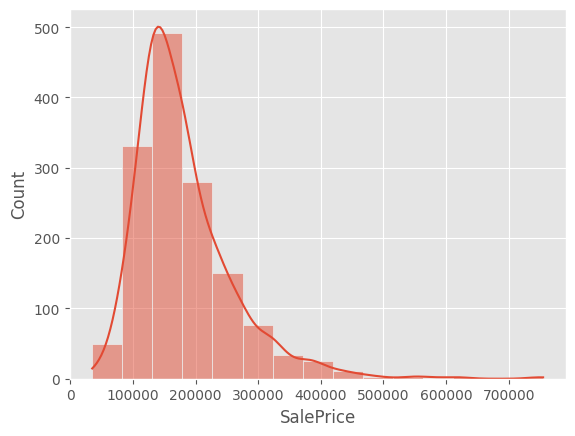

In [29]:
sns.histplot(data=df, x='SalePrice', kde=True, bins=15)

- There's no rule of thumb to the perfect bin size because every data element is different
- The goal is to find a balance between too small bins and too large.

![bins comp](https://statistics.laerd.com/statistical-guides/img/uh/laerd-statistics-example-histograms-showing-different-bin-sizes.png)

![good hist](https://statistics.laerd.com/statistical-guides/img/uh/laerd-statistics-example-histogram-frequencies-for-age.png)

([<matplotlib.axis.XTick at 0x2b9471fd0>,
 [Text(34900, 0, '34900'),
  Text(84900, 0, '84900'),
  Text(134900, 0, '134900'),
  Text(184900, 0, '184900'),
  Text(234900, 0, '234900'),
  Text(284900, 0, '284900'),
  Text(334900, 0, '334900'),
  Text(384900, 0, '384900')])

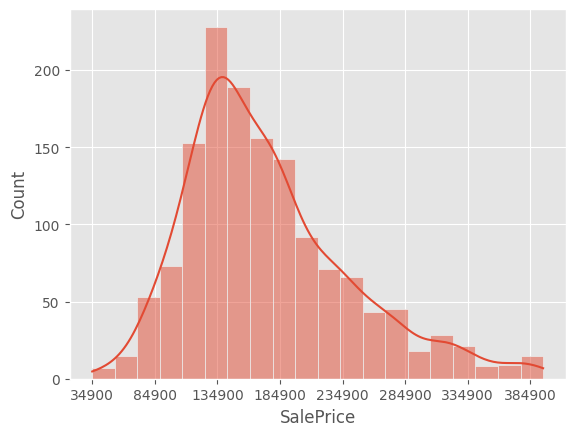

In [30]:
sns.histplot(data=df[df['SalePrice']<400000], x='SalePrice', kde=True, bins=20)
plt.xticks(np.arange(df['SalePrice'].min(), 400000, 50000))

#### Box Plots
![boxplot](https://miro.medium.com/max/9000/1*2c21SkzJMf3frPXPAR_gZA.png)

([<matplotlib.axis.XTick at 0x2b94fb450>,
 [Text(34900.0, 0, '34900'),
  Text(72650.0, 0, '72650'),
  Text(110400.0, 0, '110400'),
  Text(148150.0, 0, '148150'),
  Text(185900.0, 0, '185900'),
  Text(223650.0, 0, '223650'),
  Text(261400.0, 0, '261400'),
  Text(299150.0, 0, '299150'),
  Text(336900.0, 0, '336900'),
  Text(374650.0, 0, '374650'),
  Text(412400.0, 0, '412400'),
  Text(450150.0, 0, '450150'),
  Text(487900.0, 0, '487900'),
  Text(525650.0, 0, '525650'),
  Text(563400.0, 0, '563400'),
  Text(601150.0, 0, '601150'),
  Text(638900.0, 0, '638900'),
  Text(676650.0, 0, '676650'),
  Text(714400.0, 0, '714400'),
  Text(752150.0, 0, '752150')])

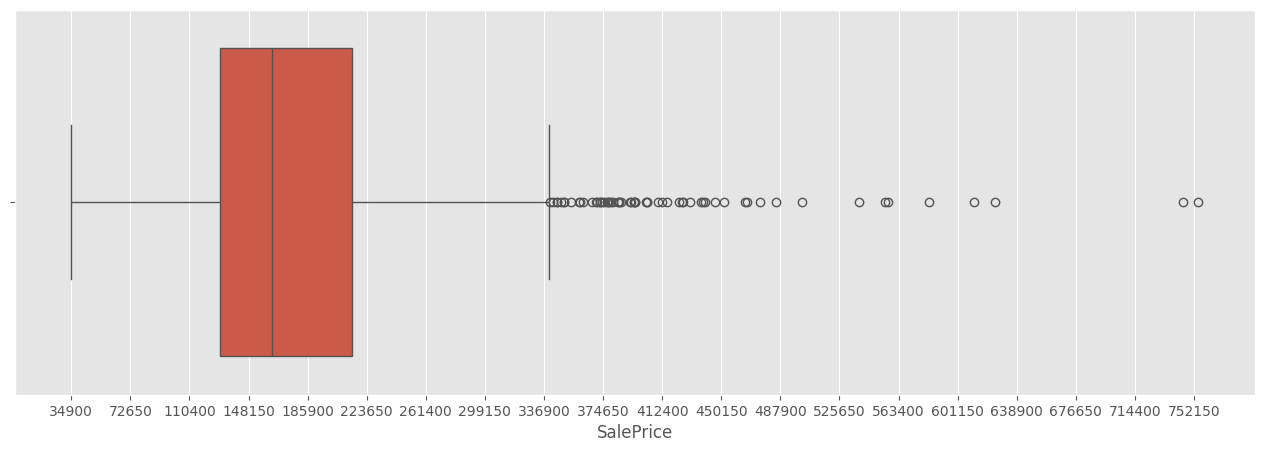

In [31]:
plt.figure(figsize=(16,5))
sns.boxplot(x=df['SalePrice'])
plt.xticks(np.arange(df['SalePrice'].min(),df['SalePrice'].max(),df['SalePrice'].max()/20))

<Axes: xlabel='LotArea'>

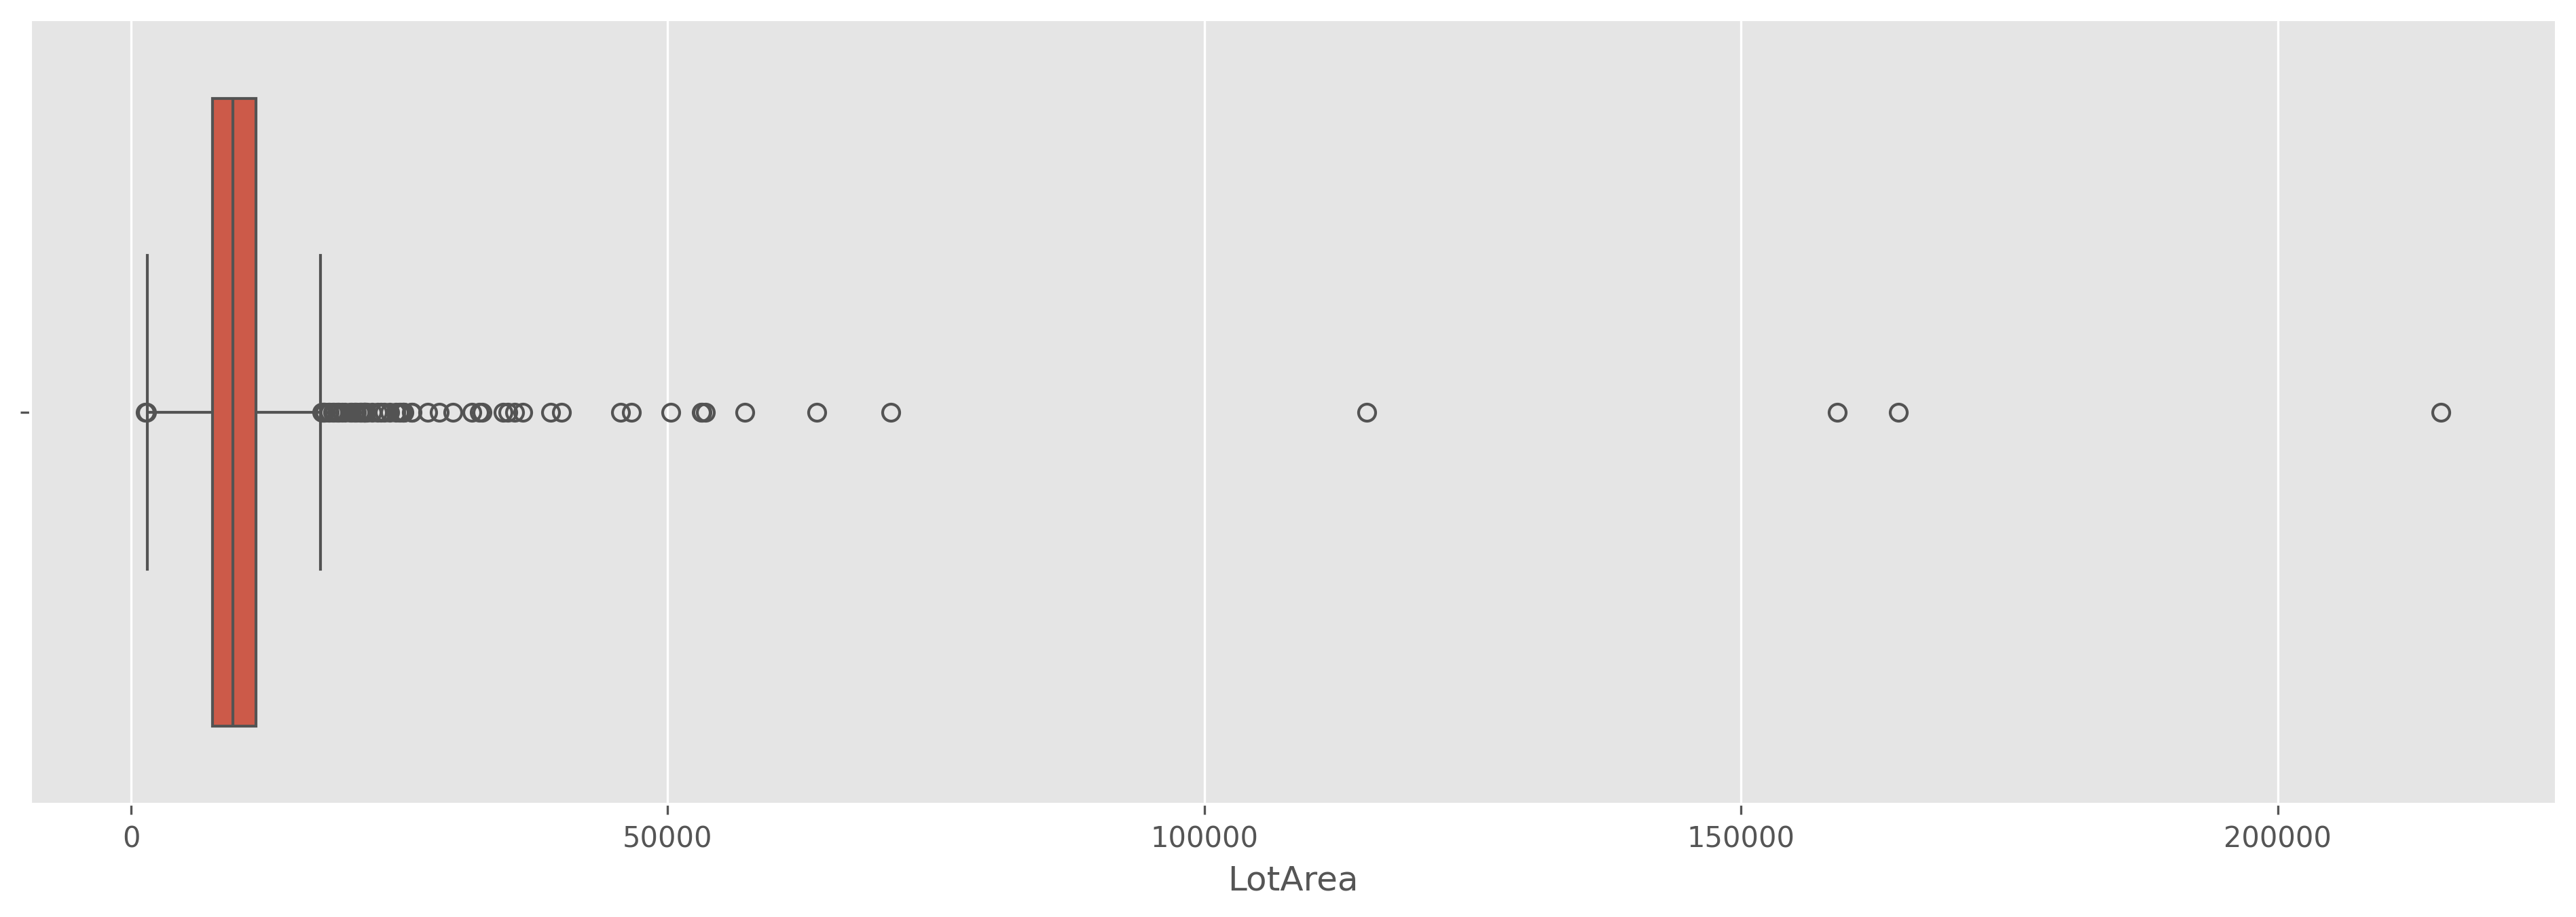

In [32]:
plt.figure(figsize=(16,5), dpi=300)
sns.boxplot(x=df['LotArea'])

**Observation**
LotArea has a lot of outliers, could be because some houses have acres of land.

<Axes: ylabel='LotArea'>

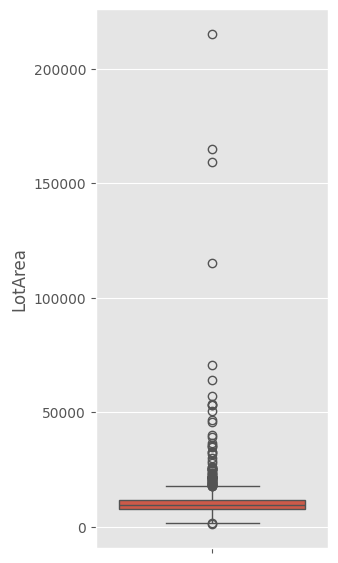

In [33]:
#using vertical view instead of horizontal
plt.figure(figsize=(3,7))
sns.boxplot(y=df['LotArea'])

Using `subplots()`
- `subplots()` is a `matplotlib` functionality that allows plotting multiple views in one
- You basically define a grid of cells and then you specify where to place each plot
- Useful for comparing visuals side-by-side

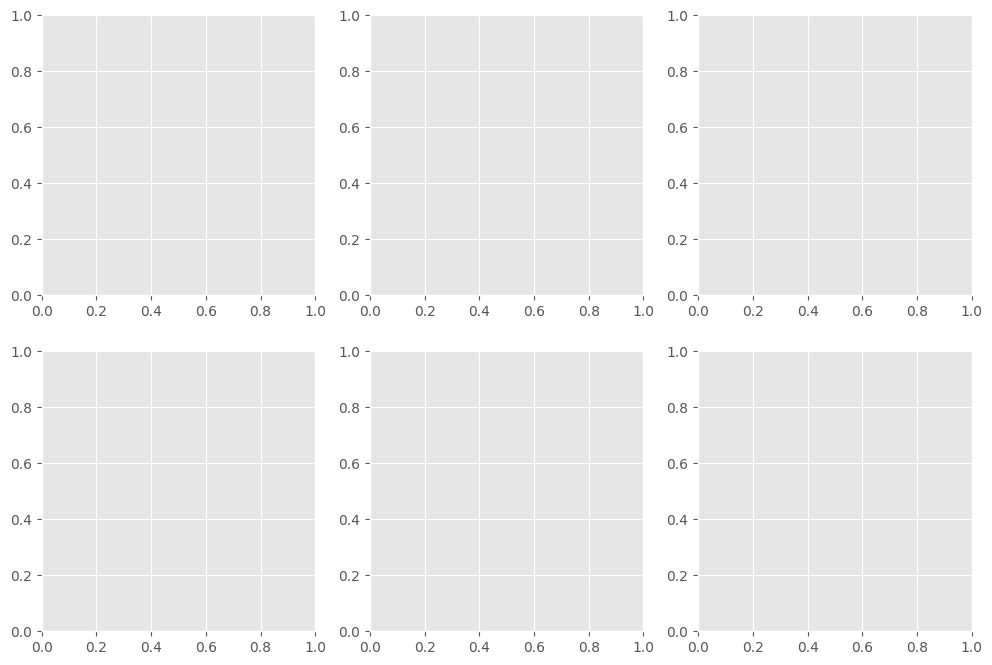

In [34]:
#build a grid (2x3) total of 6 cells
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12,8))

**Exercise** Build a side-by-side histogram and box plot visual for Sale Price and Year Built columns

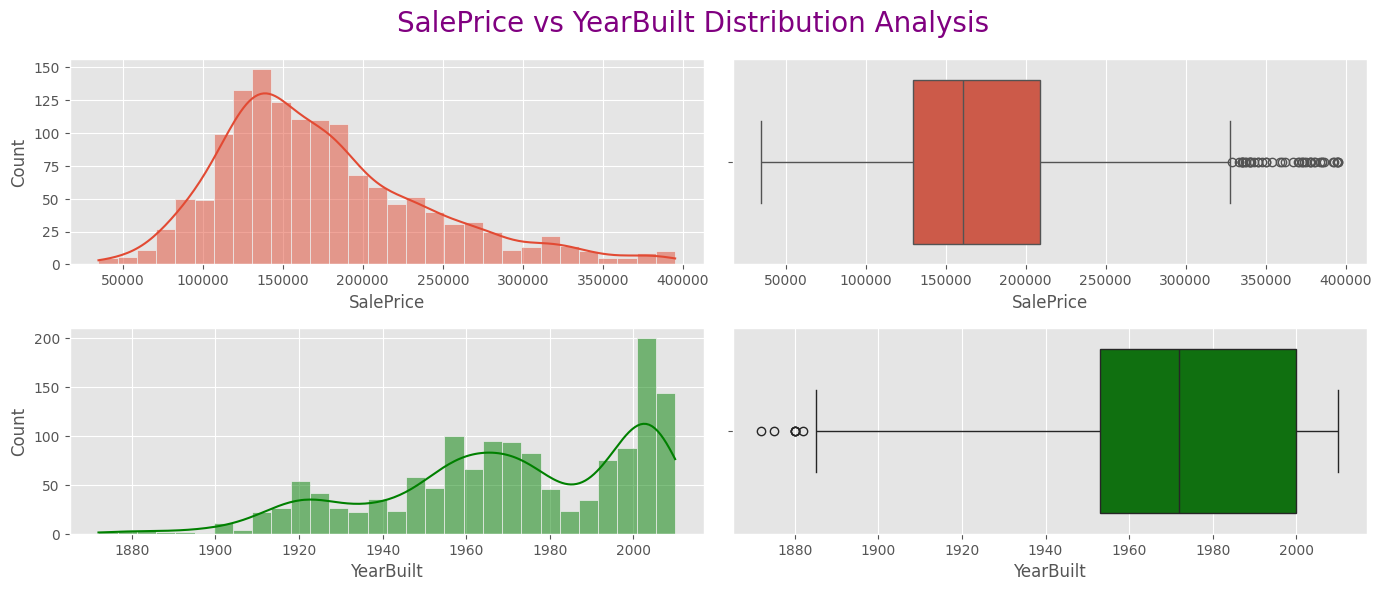

In [35]:
#build a grid (2x2) total of 4 cells
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14,6))

#inserting visuals
sns.histplot(data=df[df['SalePrice']<400000], x='SalePrice', bins=30, kde=True, ax=axes[0,0])
sns.histplot(data=df[df['SalePrice']<400000], x='YearBuilt', bins=30, kde=True, ax=axes[1,0], color='green')

sns.boxplot(data=df[df['SalePrice']<400000], x='SalePrice', ax=axes[0,1])
sns.boxplot(data=df[df['SalePrice']<400000], x='YearBuilt', ax=axes[1,1], color='green')

fig.suptitle('SalePrice vs YearBuilt Distribution Analysis', fontsize=20, color='purple')
fig.tight_layout(pad=1.2, w_pad=1)


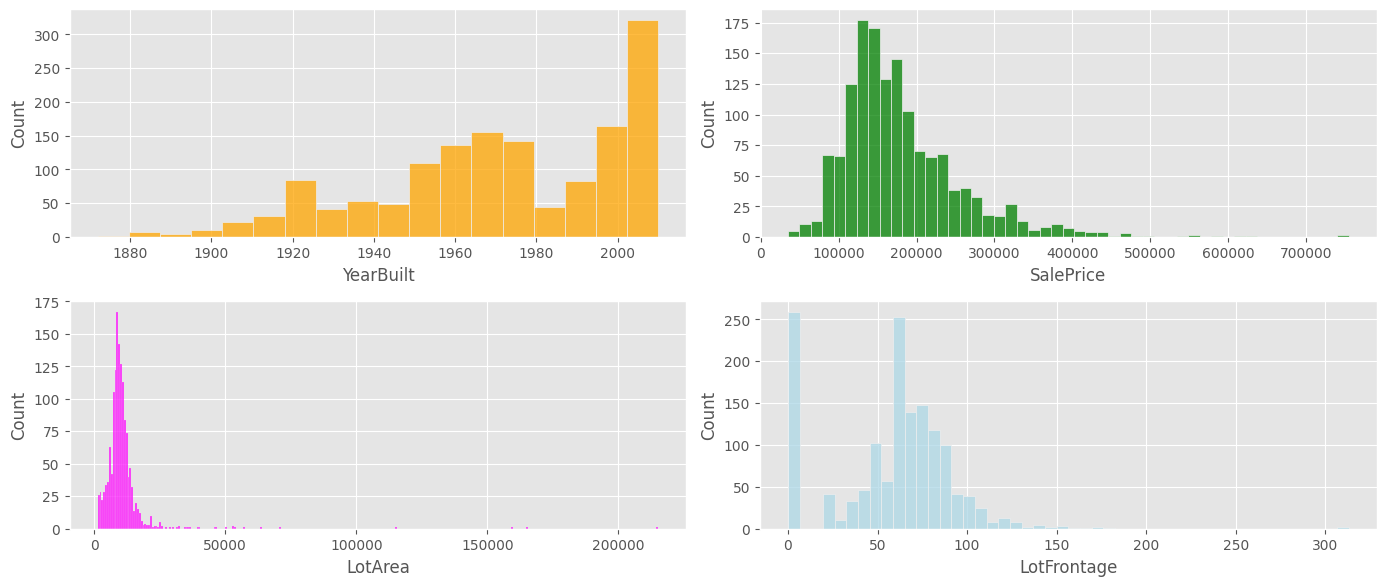

In [36]:
# define a column list
my_plot_cols = ['YearBuilt', 'SalePrice', 'LotArea', 'LotFrontage']
colors_list = ['orange', 'green', 'magenta', 'lightblue']

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14,6))

#flatten the axes so we can have a series from 0 to 3 instead of [0,0] for example
axes = axes.flatten()

#loop through each column name and plot it
for idx, col in enumerate(my_plot_cols):
    sns.histplot(data=df, x=col, ax=axes[idx], color=colors_list[idx])

fig.tight_layout(pad=1.2, w_pad=1)


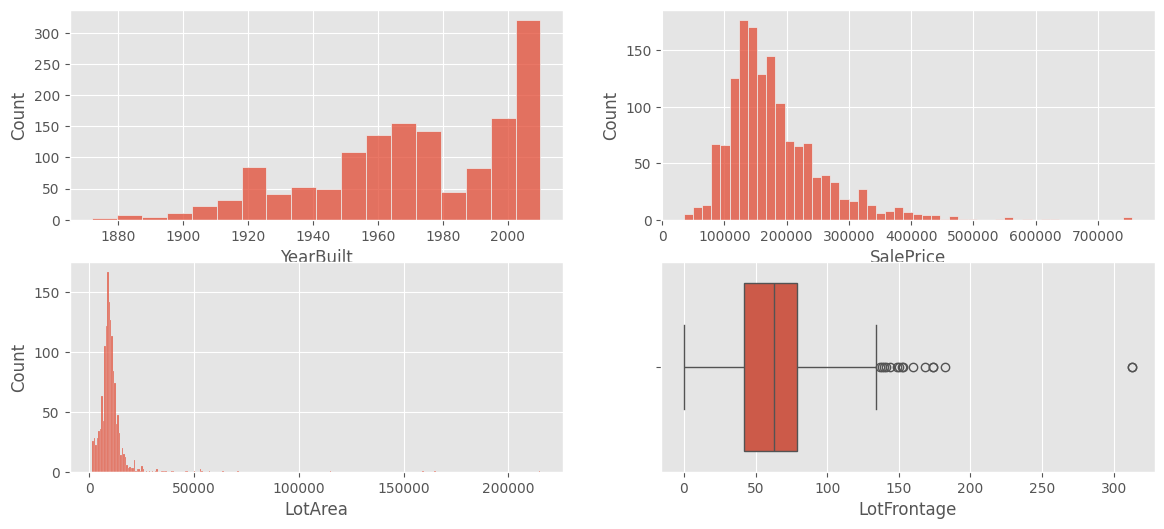

In [37]:
# define a column list
my_plot_cols = ['YearBuilt', 'SalePrice', 'LotArea', 'LotFrontage']
colors_list = ['orange', 'green', 'magenta', 'lightblue']

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14,6))

#flatten the axes so we can have a series from 0 to 3 instead of [0,0] for example
axes = axes.flatten()

#loop through each column name and plot it
for idx, col in enumerate(my_plot_cols):
    if col == 'LotFrontage':
        sns.boxplot(data=df, x=col, ax=axes[idx], )
    else:
        sns.histplot(data=df, x=col, ax=axes[idx], )

**Homework** using the same technique, build a 3 x 2 grid with histograms of 6 columns

Using `countplot()` for categorical columns

In [38]:
df['SaleCondition'].value_counts()

SaleCondition
Normal     1198
Partial     125
Abnorml     101
Family       20
Alloca       12
AdjLand       4
Name: count, dtype: int64

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'Normal'),
  Text(1, 0, 'Abnorml'),
  Text(2, 0, 'Partial'),
  Text(3, 0, 'AdjLand'),
  Text(4, 0, 'Alloca'),
  Text(5, 0, 'Family')])

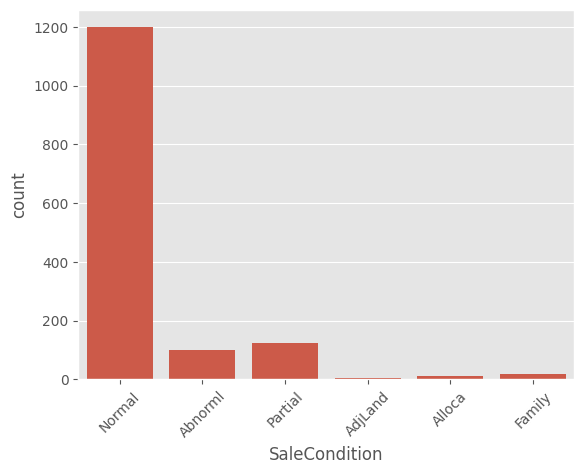

In [39]:
sns.countplot(x=df['SaleCondition'])
plt.xticks(rotation=45) #rotate labels by 45 degrees

In [40]:
df['Neighborhood'].value_counts()

Neighborhood
NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
StoneBr     25
SWISU       25
MeadowV     17
Blmngtn     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: count, dtype: int64

In [41]:
end_point = df['Neighborhood'].value_counts().max() + 20 #adding a small buffer for the diagram
steps = end_point//15
end_point, steps

(245, 16)

matplotlib color maps: https://matplotlib.org/stable/users/explain/colors/colormaps.html

/var/folders/3x/ds4ljhhn611fn_glg6pp102h0000gq/T/ipykernel_13993/581770148.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df['Neighborhood']


''

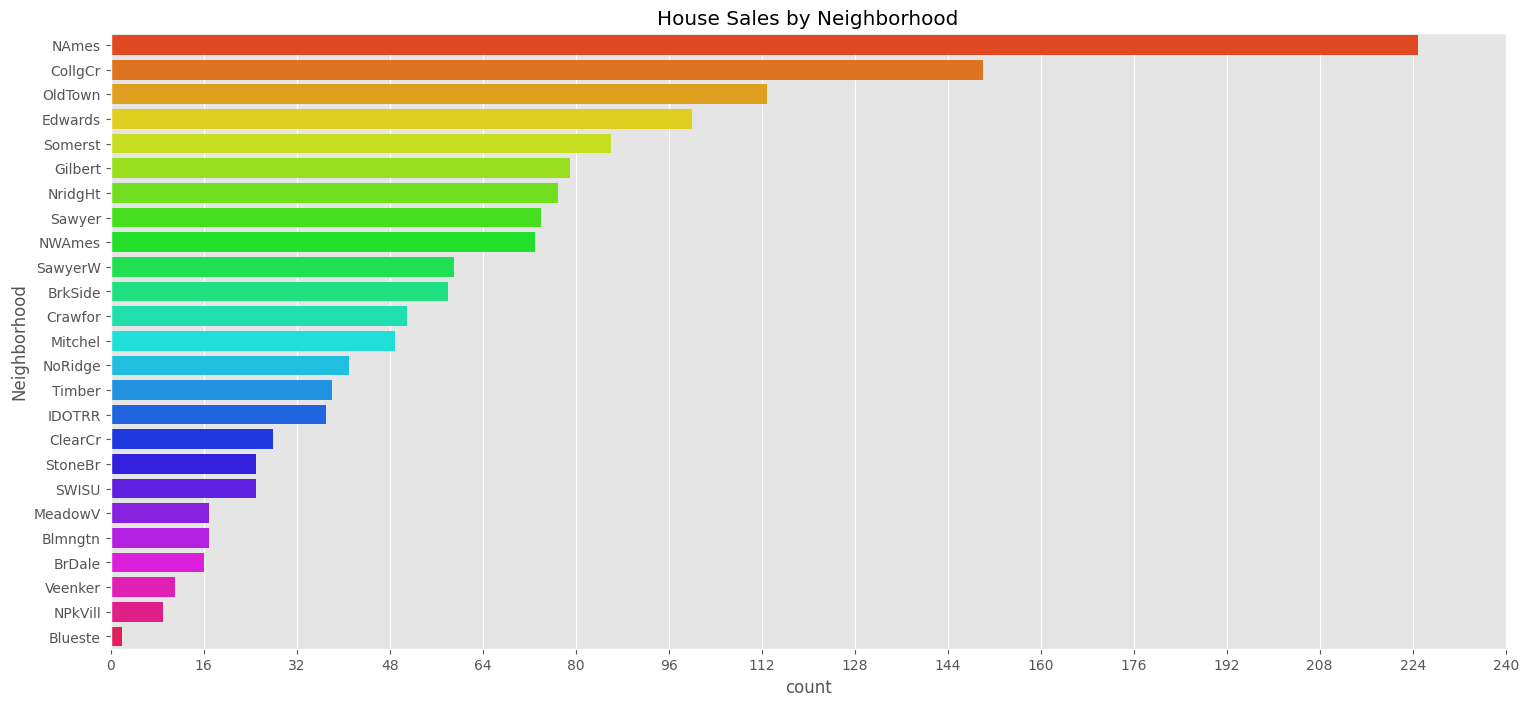

In [42]:
plt.figure(figsize=(18,8))
sns.countplot(y=df['Neighborhood']
              , order=df['Neighborhood'].value_counts().index
              , palette='hsv'
              )
end_point = df['Neighborhood'].value_counts().max() + 20 #adding a small buffer for the diagram
steps = end_point//15
plt.xticks(np.arange(0,end_point,steps))
plt.title('House Sales by Neighborhood')
;

### Multivariate Analysis

- Performing analysis on 2 or more variables/columns
- Finding the relationship between 2 or more attributes
- Types:
    - Numeric vs Numeric
    - Categorical vs Numeric
    - Categorical vs Categorical

#### Numeric vs Numeric

Text(0, 0.5, 'Above grade (ground) living area square feet')

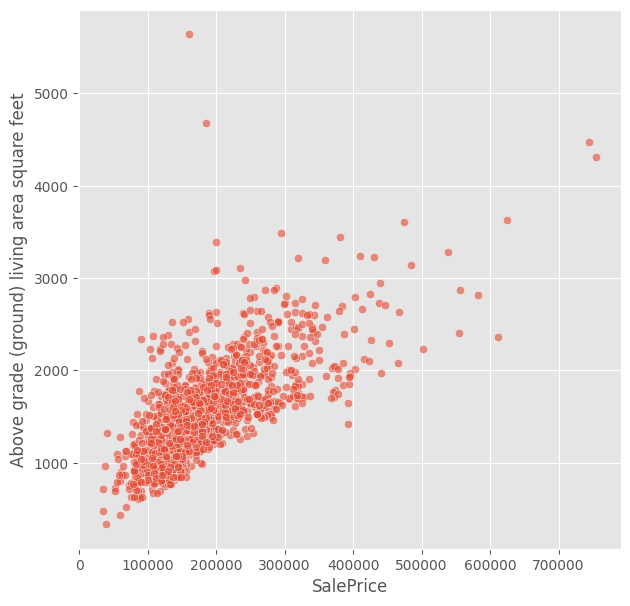

In [43]:
plt.figure(figsize=(7,7))
sns.scatterplot(data=df, x='SalePrice', y='GrLivArea', alpha=0.6)
plt.ylabel('Above grade (ground) living area square feet')

- There's a positive relationship between SalePrice and GrLivArea
- If Price goes up, GrLivArea goes up too.

You can add more columns to the analysis above by using shape, color, and size atteibutes

Text(0, 0.5, 'Above grade (ground) living area square feet')

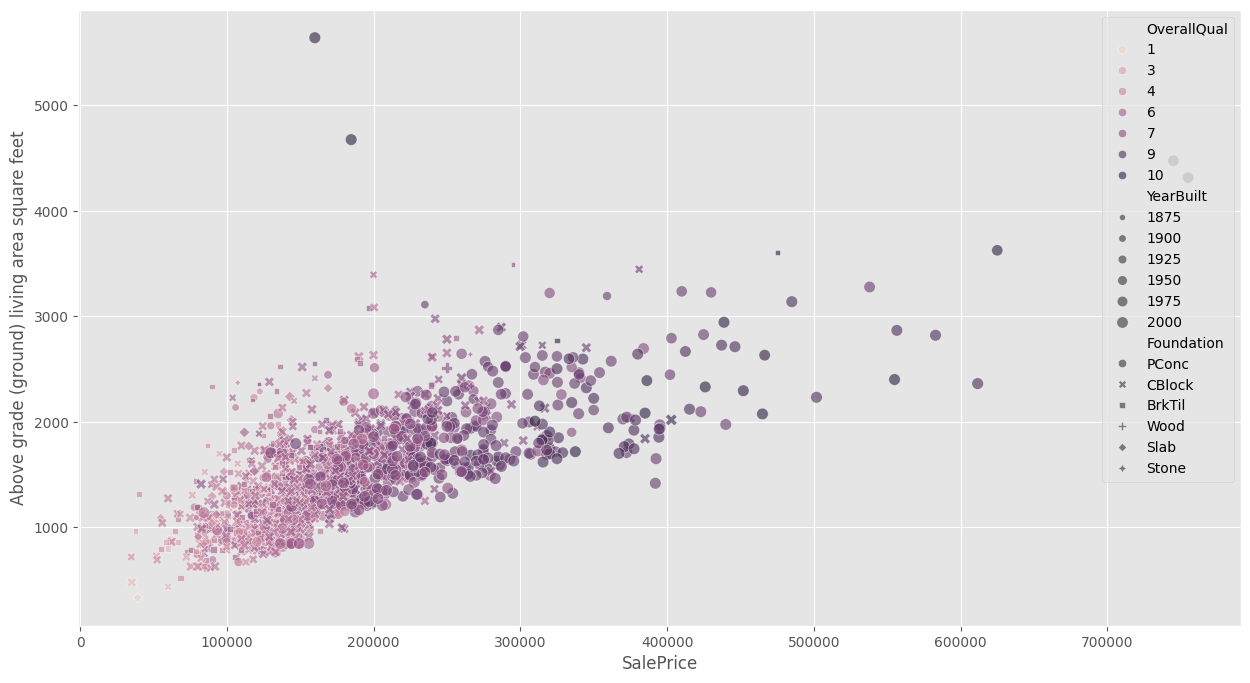

In [44]:
plt.figure(figsize=(15,8))
sns.scatterplot(data=df, x='SalePrice', y='GrLivArea', alpha=0.6
                , hue='OverallQual'
                , size='YearBuilt'
                , style='Foundation'
                )
plt.ylabel('Above grade (ground) living area square feet')

Regression Plot Using `regplot`

Text(0, 0.5, 'Above grade (ground) living area square feet')

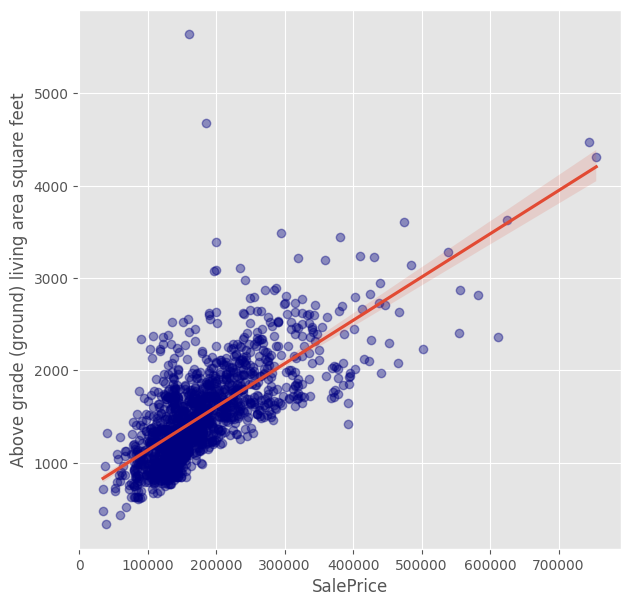

In [45]:
plt.figure(figsize=(7,7))
sns.regplot(data=df, x='SalePrice', y='GrLivArea', scatter_kws={'color':'navy', 'alpha':.4})
plt.ylabel('Above grade (ground) living area square feet')

`joinplot()` is  very useful and comprehensive because it provides:
- Scatterplot
- Regression fitted line
- Histogram of each measure

Joint plots include the density along each axis, which can be useful for really dense areas of the plot that would be hard to see otherwise. They can also detect skew along each axis.

Text(37.722222222222214, 0.5, 'Above grade (ground) living area square feet')

<Figure size 700x700 with 0 Axes>

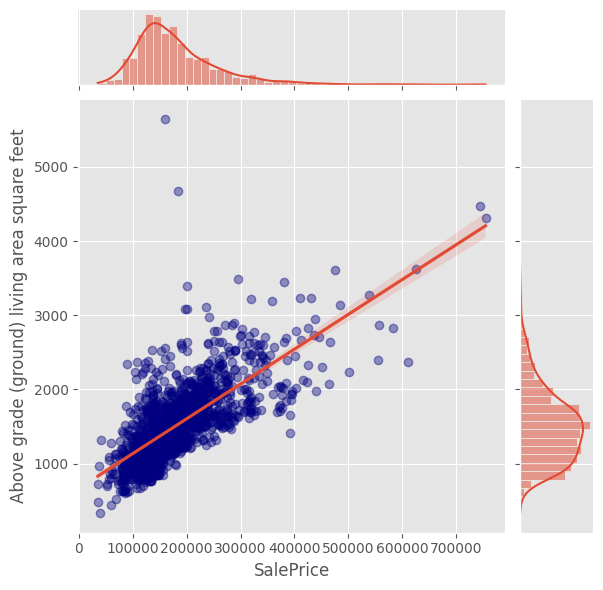

In [46]:
plt.figure(figsize=(7,7))
sns.jointplot(data=df, x='SalePrice', y='GrLivArea', kind='reg', scatter_kws={'color':'navy', 'alpha':.4})
plt.ylabel('Above grade (ground) living area square feet')

- Correlation holds the strongest for houses between $100K and $300K sales price
- the highest concentration is between 100-200
- Lower Sale Price and Lower Above Ground Living Space are strongly correlated
- there is the highest density of saleprice at 150000 where the above grade is around 1500

Text(37.722222222222214, 0.5, 'Above grade (ground) living area square feet')

<Figure size 700x700 with 0 Axes>

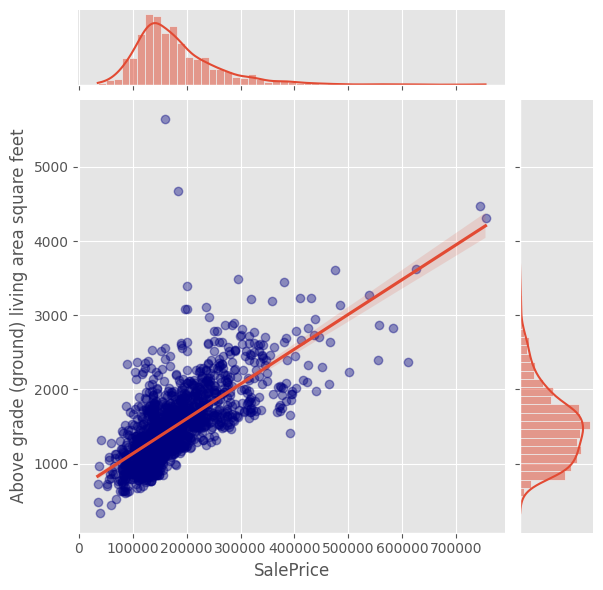

In [47]:
plt.figure(figsize=(7,7))
sns.jointplot(data=df, x='SalePrice', y='GrLivArea', kind='reg', scatter_kws={'color':'navy', 'alpha':.4})
plt.ylabel('Above grade (ground) living area square feet')

<Figure size 700x700 with 0 Axes>

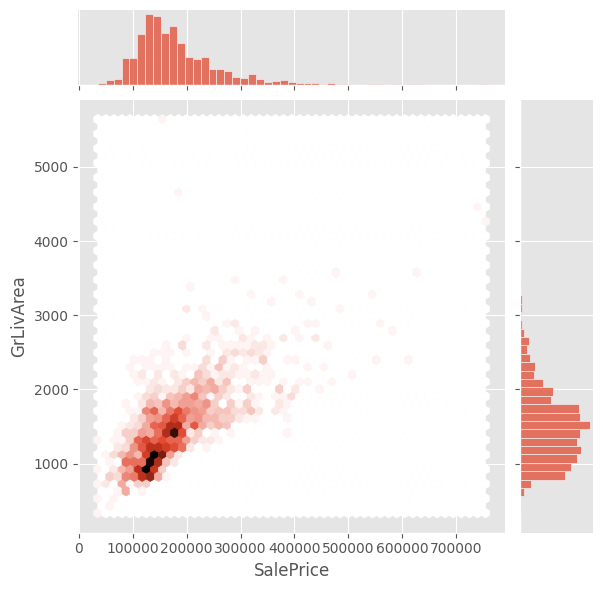

In [48]:
plt.figure(figsize=(7,7))
sns.jointplot(data=df, x='SalePrice', y='GrLivArea', kind='hex')

##### Correlation Analysis and Heatmaps

In [49]:
corr_matrix = df.corr(numeric_only=True)
corr_matrix

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,YrSold,SalePrice
LotFrontage,1.000000,0.100739,0.176561,-0.053457,0.036853,0.078686,0.105010,0.076670,-0.009312,0.160829,...,0.201473,-0.016780,0.069605,0.027366,0.023499,0.022969,0.114106,-0.059606,-0.012094,0.209624
LotArea,0.100739,1.000000,0.105806,-0.005636,0.014228,0.013788,0.103321,0.214103,0.111170,-0.002618,...,0.180403,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,-0.014261,0.263843
OverallQual,0.176561,0.105806,1.000000,-0.091932,0.572323,0.550684,0.407252,0.239666,-0.059119,0.308159,...,0.562022,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,-0.027347,0.790982
OverallCond,-0.053457,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.125694,-0.046231,0.040229,-0.136841,...,-0.151521,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,0.043950,-0.077856
YearBuilt,0.036853,0.014228,0.572323,-0.375983,1.000000,0.592855,0.311600,0.249503,-0.049107,0.149040,...,0.478954,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,-0.013618,0.522897
YearRemodAdd,0.078686,0.013788,0.550684,0.073741,0.592855,1.000000,0.176529,0.128451,-0.067759,0.181133,...,0.371600,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.035743,0.507101
MasVnrArea,0.105010,0.103321,0.407252,-0.125694,0.311600,0.176529,1.000000,0.261256,-0.071330,0.113862,...,0.370884,0.159991,0.122528,-0.109907,0.019144,0.062248,0.011928,-0.029512,-0.008317,0.472614
BsmtFinSF1,0.076670,0.214103,0.239666,-0.046231,0.249503,0.128451,0.261256,1.000000,-0.050117,-0.495251,...,0.296970,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,0.014359,0.386420
BsmtFinSF2,-0.009312,0.111170,-0.059119,0.040229,-0.049107,-0.067759,-0.071330,-0.050117,1.000000,-0.209294,...,-0.018227,0.067898,0.003093,0.036543,-0.029993,0.088871,0.041709,0.004940,0.031706,-0.011378
BsmtUnfSF,0.160829,-0.002618,0.308159,-0.136841,0.149040,0.181133,0.113862,-0.495251,-0.209294,1.000000,...,0.183303,-0.005316,0.129005,-0.002538,0.020764,-0.012579,-0.035092,-0.023837,-0.041258,0.214479


We can visualize the matrix above for easier analysis

<Axes: >

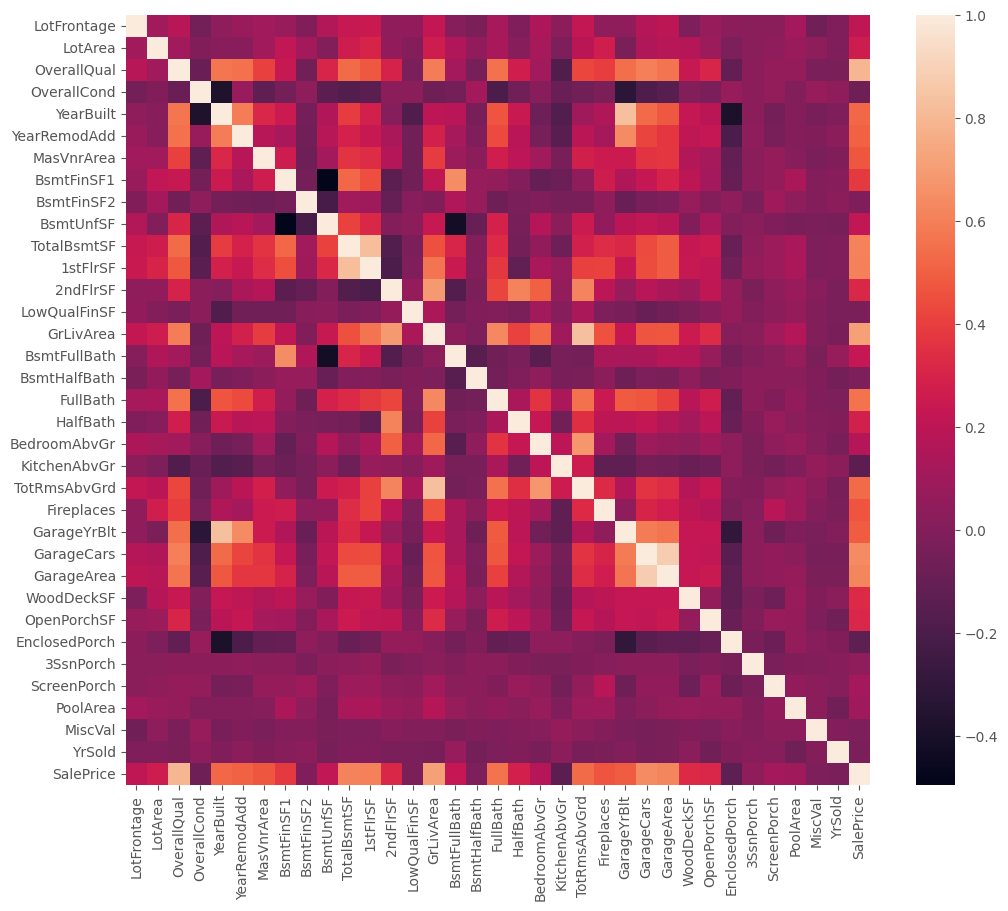

In [50]:
plt.figure(figsize=(12,10))
sns.heatmap(corr_matrix)

- We can see above we have features that correlate with each other and some that don't 
- The view is still busy, we can summarize it further by looking for high correlation
- It's always recommended to start with looking for high correlation with the target (SalePrice) for our predictive model

**Exercise** Build a visual that shows the highly correlated columns with SalePrice (e.g. 0.55 as the threshold)

In [51]:
#define the threshold
threshold = .55

corr_sale_price = corr_matrix['SalePrice']

#get the values that are higher than .55
high_corr_cols = corr_sale_price[abs(corr_sale_price)>threshold].index
high_corr_cols

Index(['OverallQual', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'FullBath',
       'GarageCars', 'GarageArea', 'SalePrice'],
      dtype='object')

<Axes: >

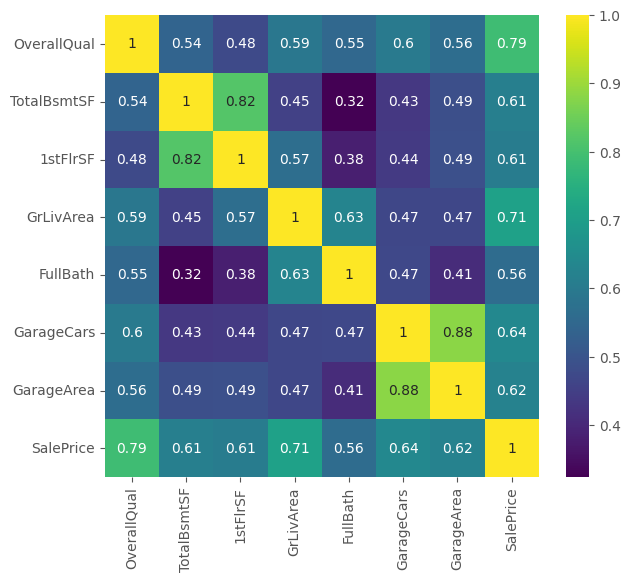

In [52]:
high_corr_cols_matrix = df[high_corr_cols].corr()

plt.figure(figsize=(7,6))
sns.heatmap(high_corr_cols_matrix, cmap='viridis', annot=True)

Observation:
- OverallQual is a categorical column (encoded to number), but has a wide range. Therefore, we can use its correlation score and it's the highest among all other scores.
- grlivingarea is second in high correlation to SalePrice
- Features that have high inner-correlation (multicollinearity) can be dropped (one of the 2 can be dropped) since they do not add much value.

Correlation and Distribution Analysis Using `pairplots()`

- For a column with another, it builds a scatterplot
- For a column with itself, it builds a histogram

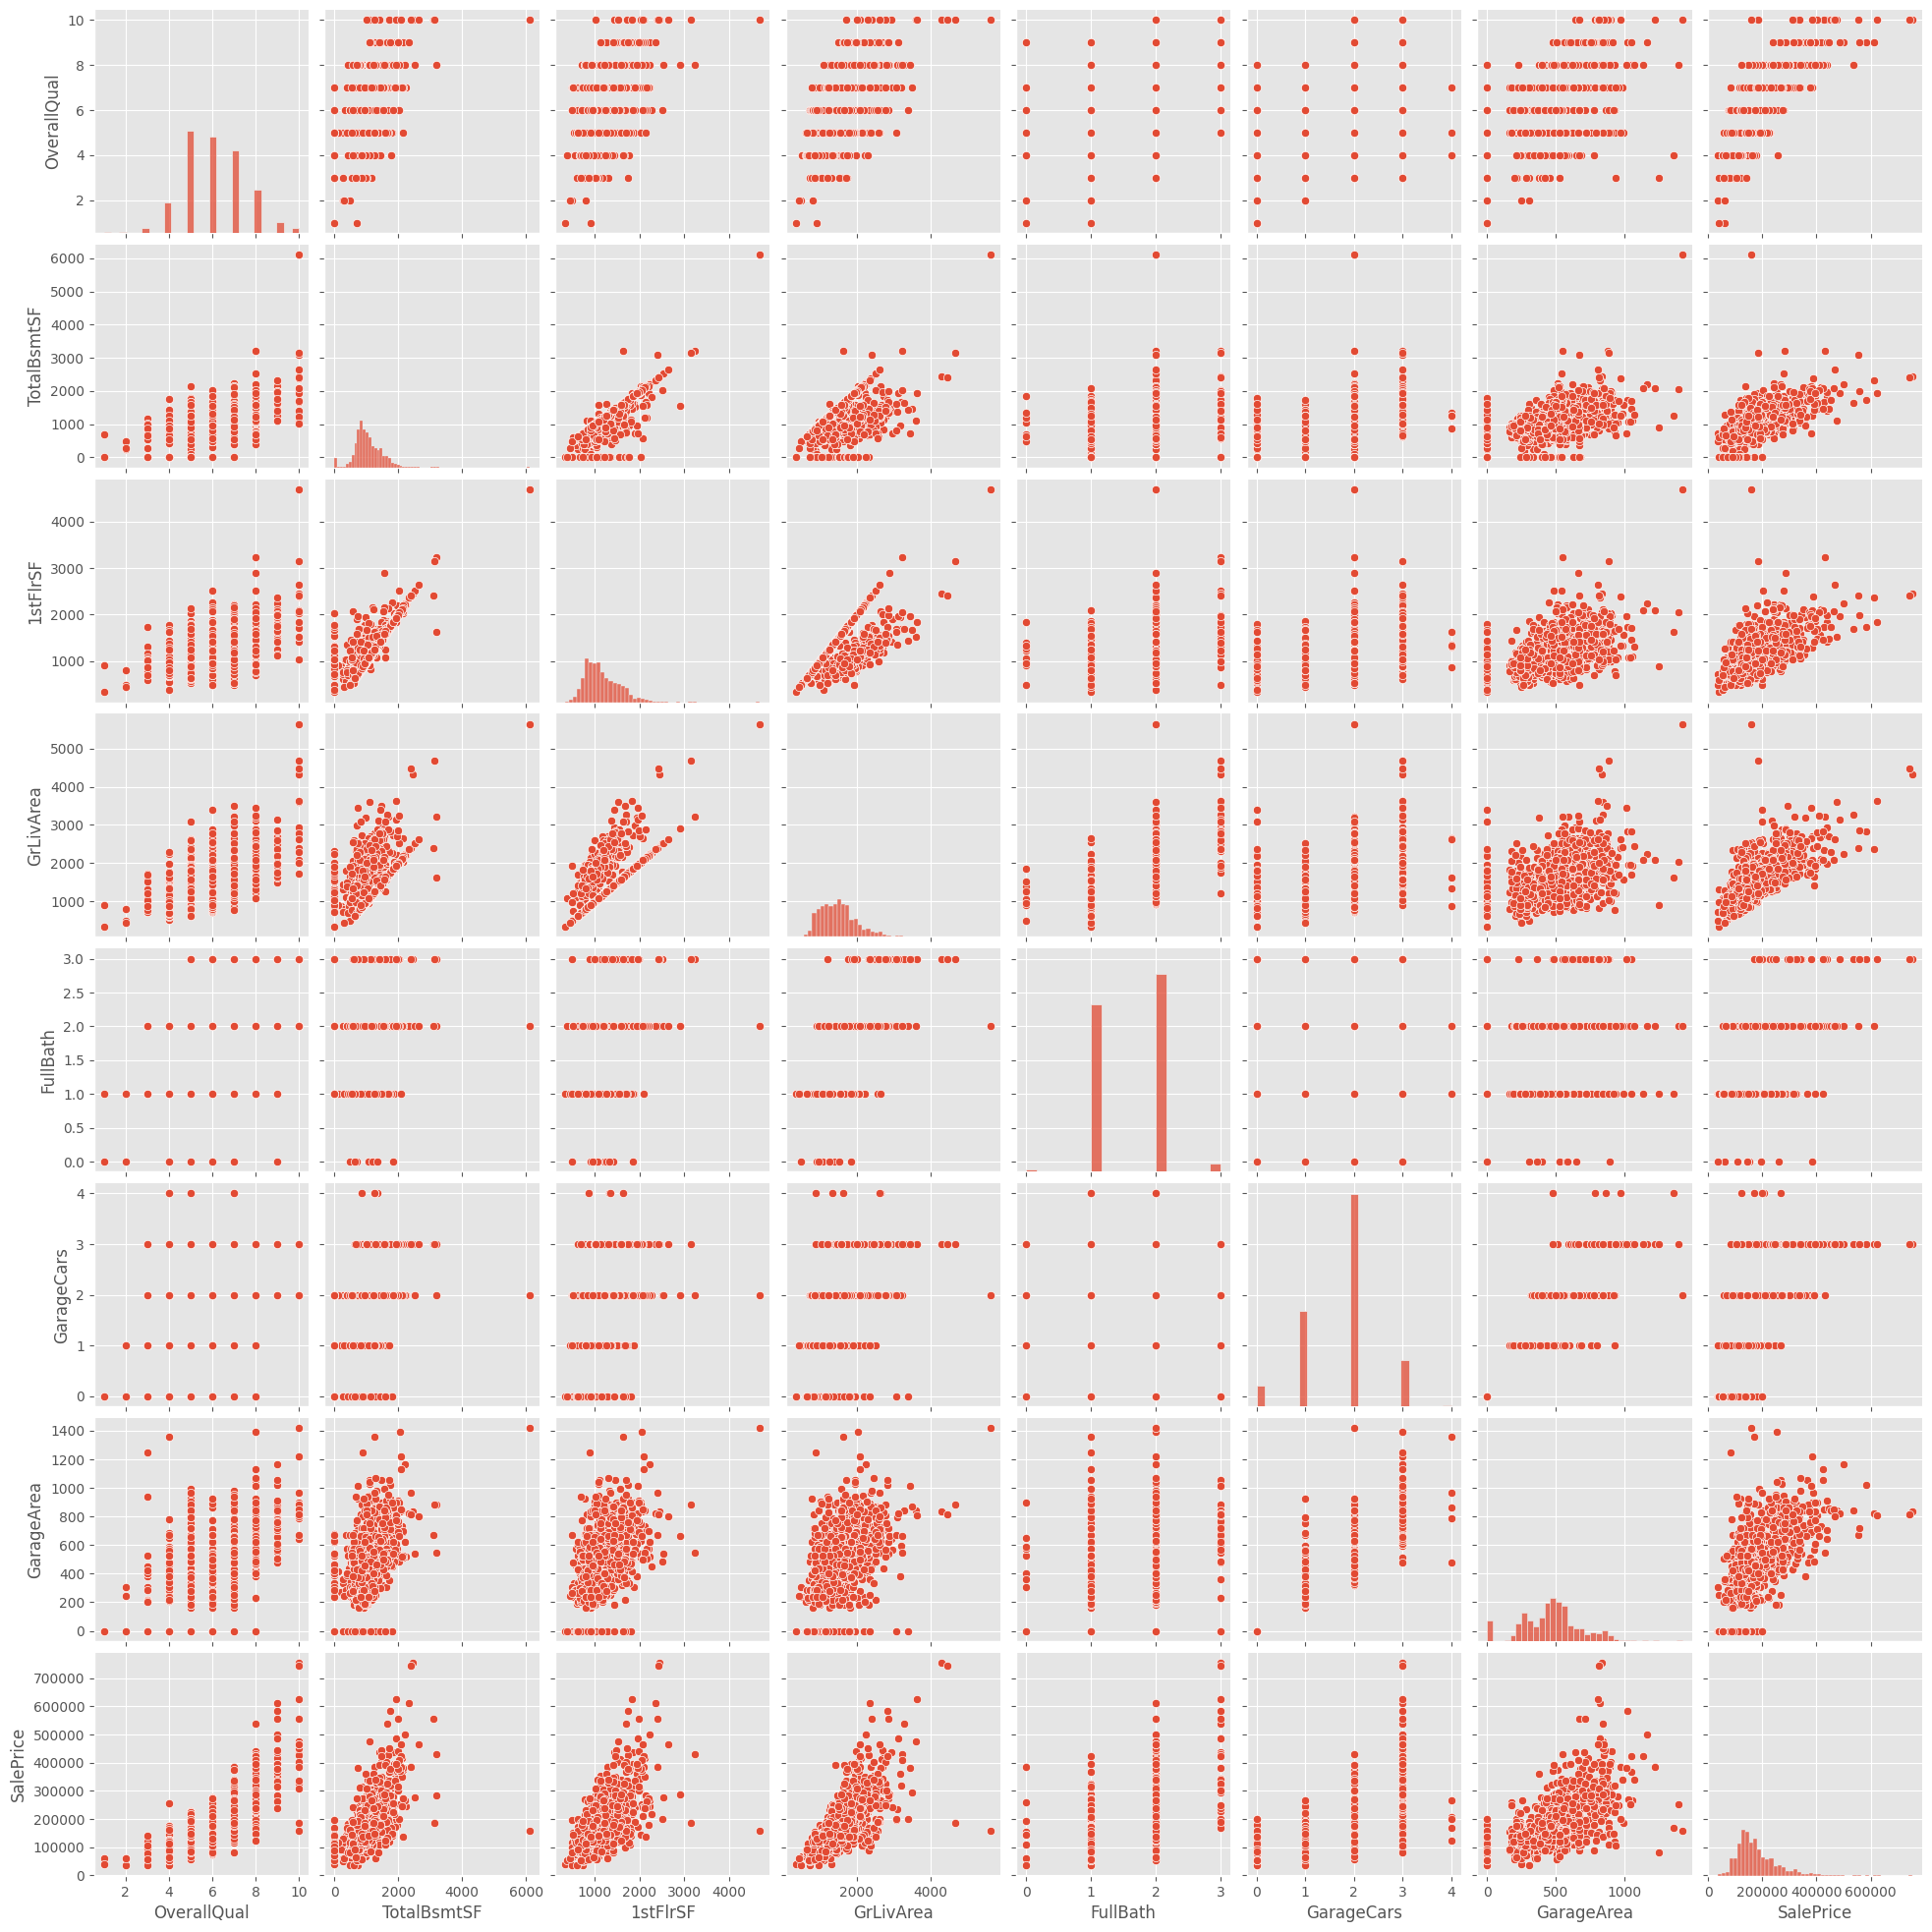

In [54]:
sns.pairplot(df[high_corr_cols])

In [55]:
df.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

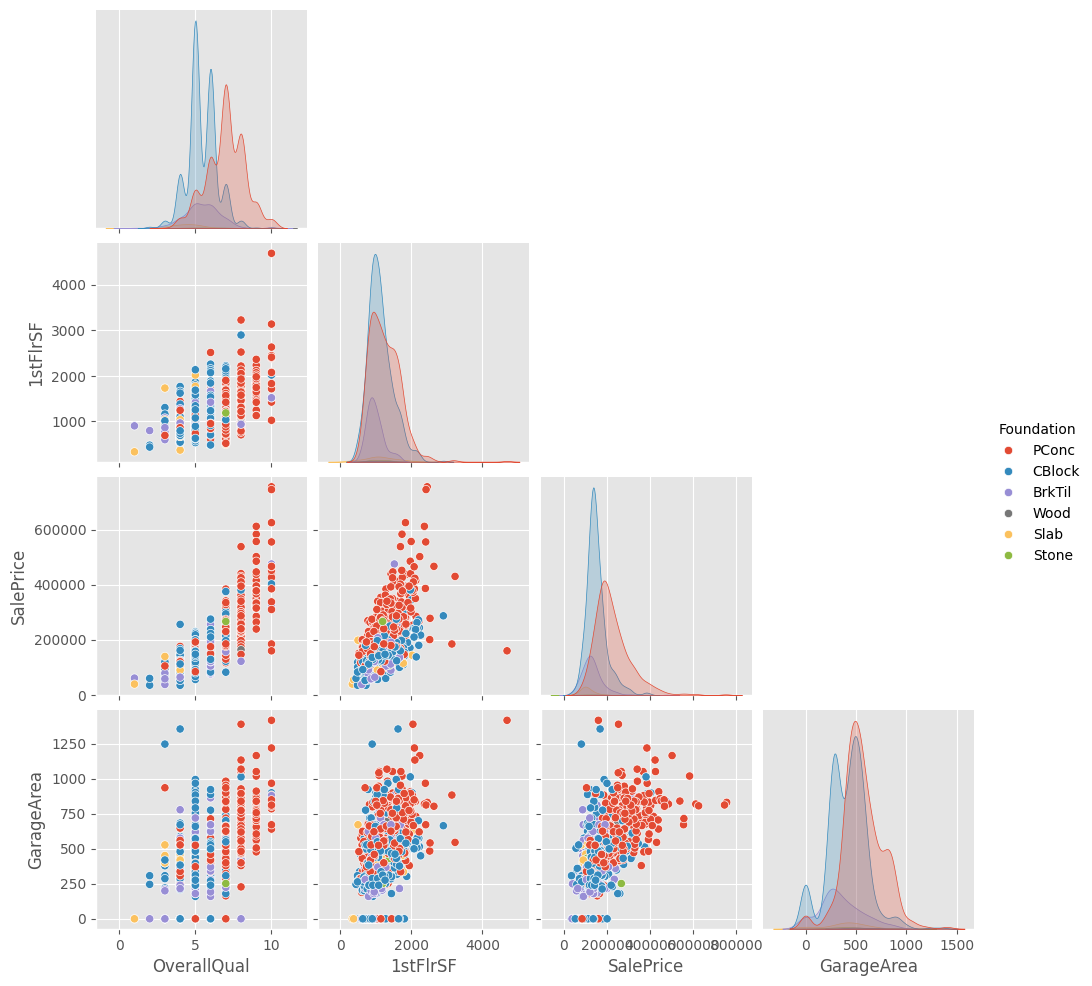

In [58]:
col_sel = ['OverallQual', '1stFlrSF', 'SalePrice', 'GarageArea', 'Foundation']
sns.pairplot(df[col_sel], hue='Foundation', corner=True)

### Numeric vs Categorical

''

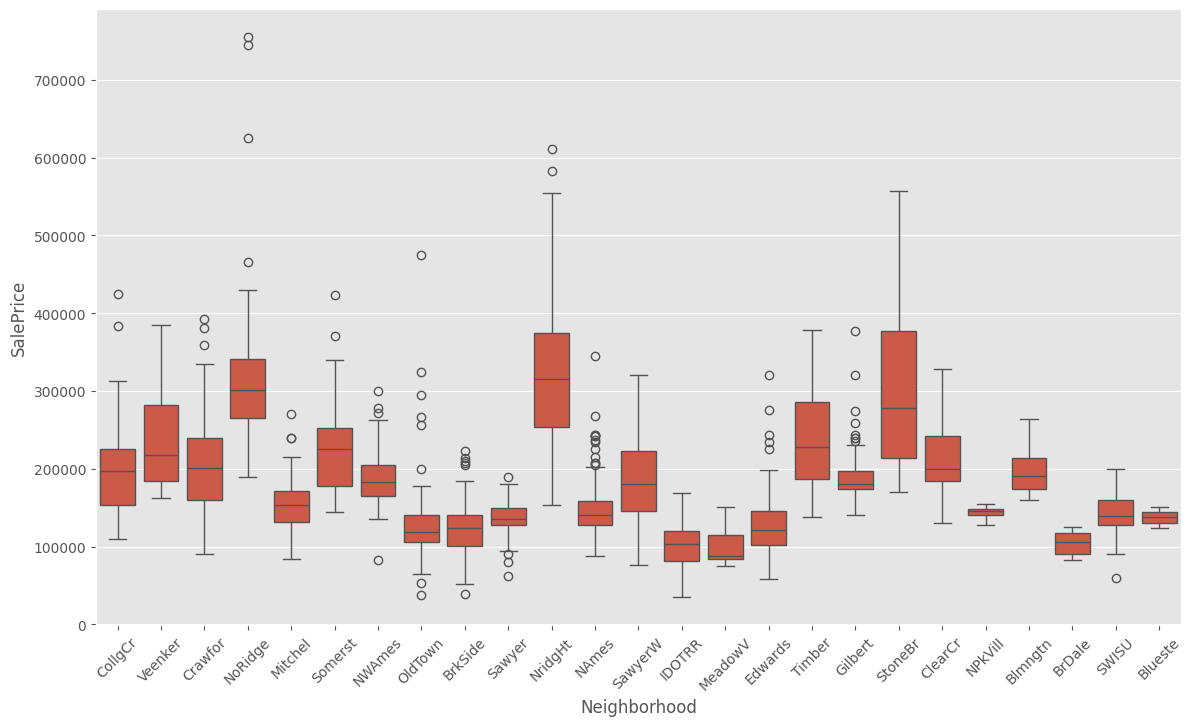

In [62]:
plt.figure(figsize=(14,8))
sns.boxplot(x=df['Neighborhood'], y=df['SalePrice'])
plt.xticks(rotation=45)
;

**Observation**
- Distribution various across neighborhoods
- NoRidge has the biggest outliers
- Most is below 400,000 dollar and above 100,000 salesprice 
- Except for 2 or 3, most neighborhoods have a median between 100 to 200k
- NridgeHt and StoneBr have very high ranges and a heavy positive skew, but seemingly no outliers.

(array([100000., 200000., 300000., 400000., 500000., 600000., 700000.,
        800000.]),
 [Text(100000.0, 0, '100000'),
  Text(200000.0, 0, '200000'),
  Text(300000.0, 0, '300000'),
  Text(400000.0, 0, '400000'),
  Text(500000.0, 0, '500000'),
  Text(600000.0, 0, '600000'),
  Text(700000.0, 0, '700000'),
  Text(800000.0, 0, '800000')])

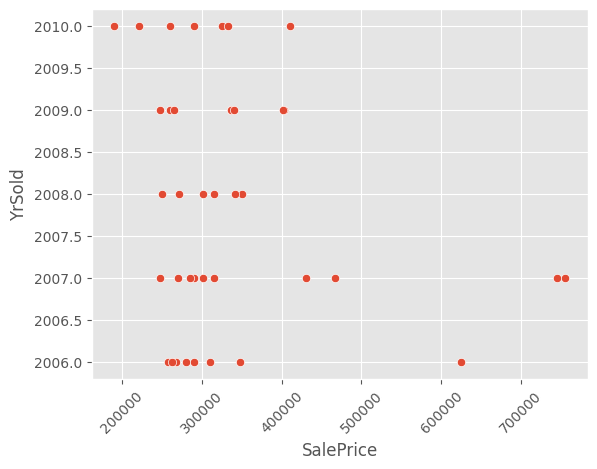

In [69]:

df_NoRidge = df[df['Neighborhood'] == 'NoRidge']
sns.scatterplot(data=df_NoRidge, y='YrSold', x='SalePrice')
plt.xticks(rotation=45)

In [70]:
df['Neighborhood'].unique()

array(['CollgCr', 'Veenker', 'Crawfor', 'NoRidge', 'Mitchel', 'Somerst',
       'NWAmes', 'OldTown', 'BrkSide', 'Sawyer', 'NridgHt', 'NAmes',
       'SawyerW', 'IDOTRR', 'MeadowV', 'Edwards', 'Timber', 'Gilbert',
       'StoneBr', 'ClearCr', 'NPkVill', 'Blmngtn', 'BrDale', 'SWISU',
       'Blueste'], dtype=object)

`swarmplots()`

In [78]:
df_Neigh_Focus = df[df['Neighborhood'].isin(['NAmes', 'NoRidge', 'StoneBr', 'Timber', 'Blueste','Sawyer', 'NridgHt'])]
df_Neigh_Focus.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
4,SC60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,No,No,No,0,Dec,2008,WD,Normal,250000
10,SC20,RL,70.0,11200,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,No,No,No,0,Feb,2008,WD,Normal,129500
11,SC60,RL,85.0,11924,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,No,No,No,0,Jul,2006,New,Partial,345000
12,SC20,RL,0.0,12968,Pave,NaN,IR2,Lvl,AllPub,Inside,...,0,No,No,No,0,Sep,2008,WD,Normal,144000
14,SC20,RL,0.0,10920,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,No,GdWo,No,0,May,2008,WD,Normal,157000


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/categorical.py:3399: UserWarning: 8.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<Axes: xlabel='Neighborhood', ylabel='SalePrice'>

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/categorical.py:3399: UserWarning: 10.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


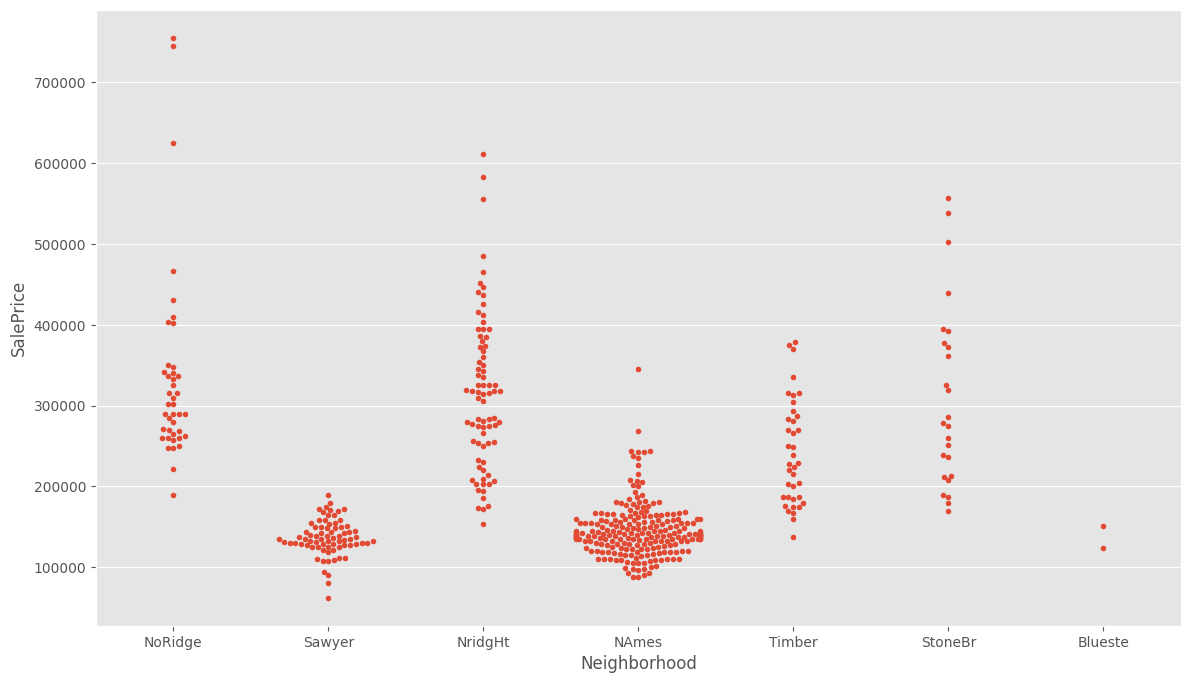

In [79]:
plt.figure(figsize=(14,8))
sns.swarmplot(data=df_Neigh_Focus, x='Neighborhood', y='SalePrice', size=4)

Does the overall quality of some neighborhoods justify the high prices?

<Axes: xlabel='Neighborhood', ylabel='SalePrice'>

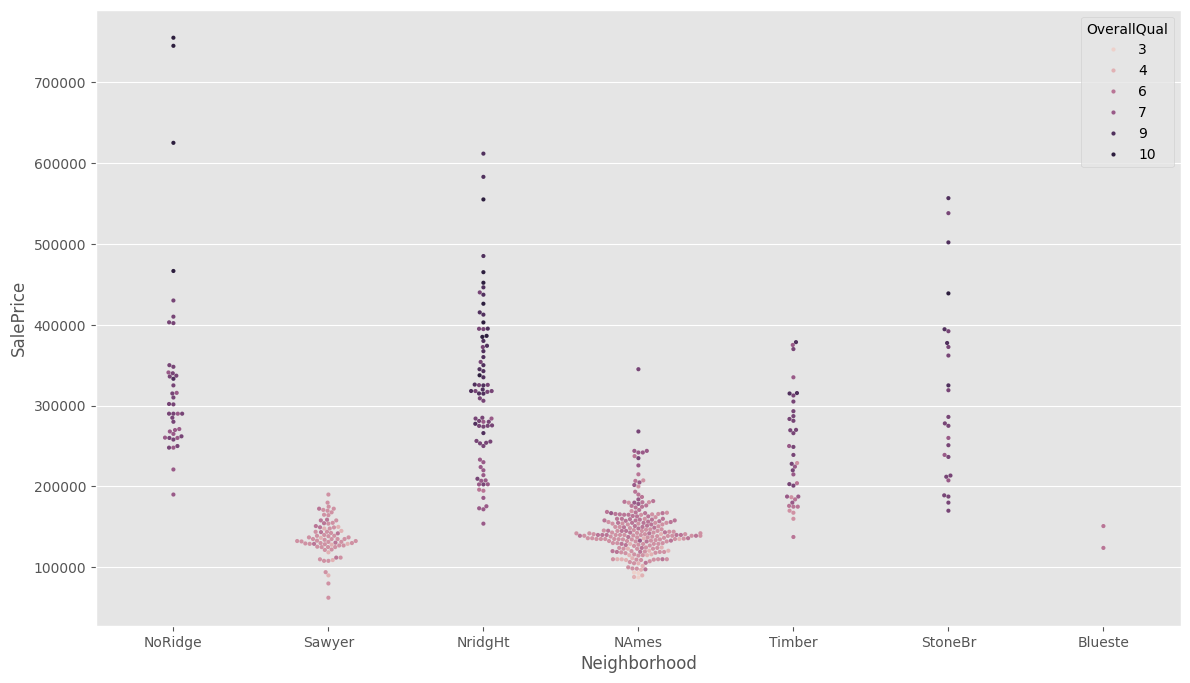

In [81]:
plt.figure(figsize=(14,8))
sns.swarmplot(data=df_Neigh_Focus, x='Neighborhood', y='SalePrice', size=3, hue='OverallQual')

**Observations**
- higher Qual have high SalePrices
- the more expensive the higher the quality
- Correlation. Highest quality drives higher prices.

<Axes: xlabel='Neighborhood', ylabel='SalePrice'>

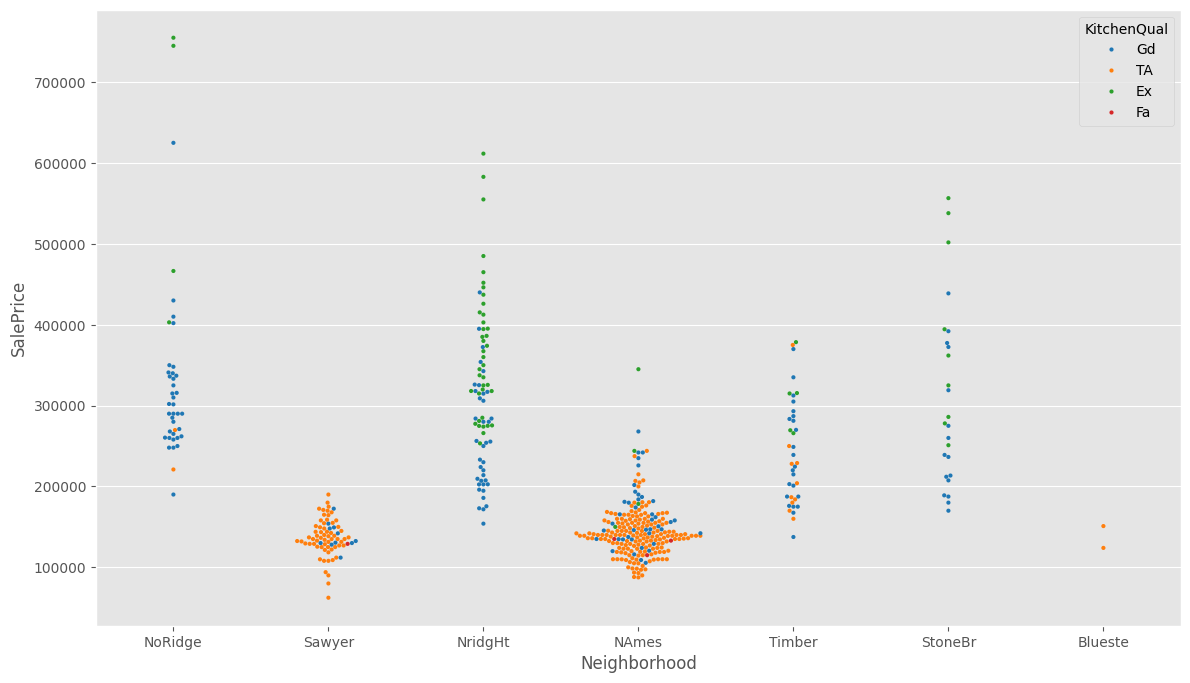

In [86]:
plt.figure(figsize=(14,8))
sns.swarmplot(data=df_Neigh_Focus, x='Neighborhood', y='SalePrice', size=3, hue='KitchenQual', palette='tab10')

<Axes: xlabel='Neighborhood', ylabel='SalePrice'>

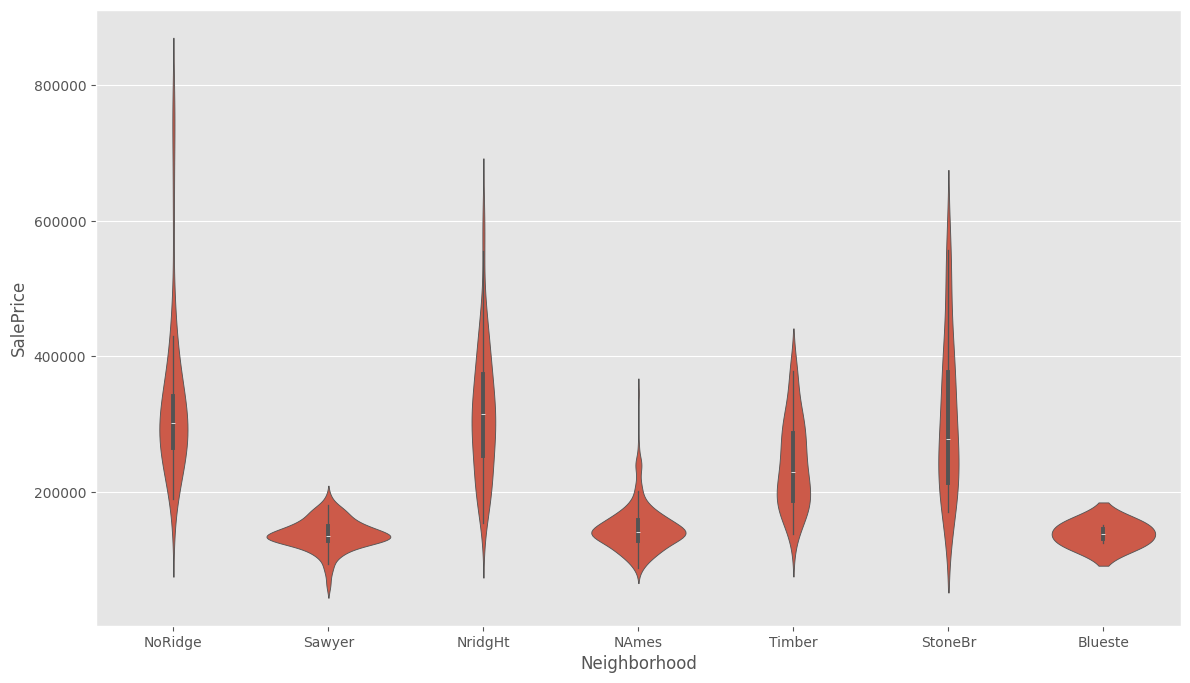

In [84]:
plt.figure(figsize=(14,8))
sns.violinplot(data=df_Neigh_Focus, x='Neighborhood', y='SalePrice')

<Axes: xlabel='Neighborhood', ylabel='SalePrice'>

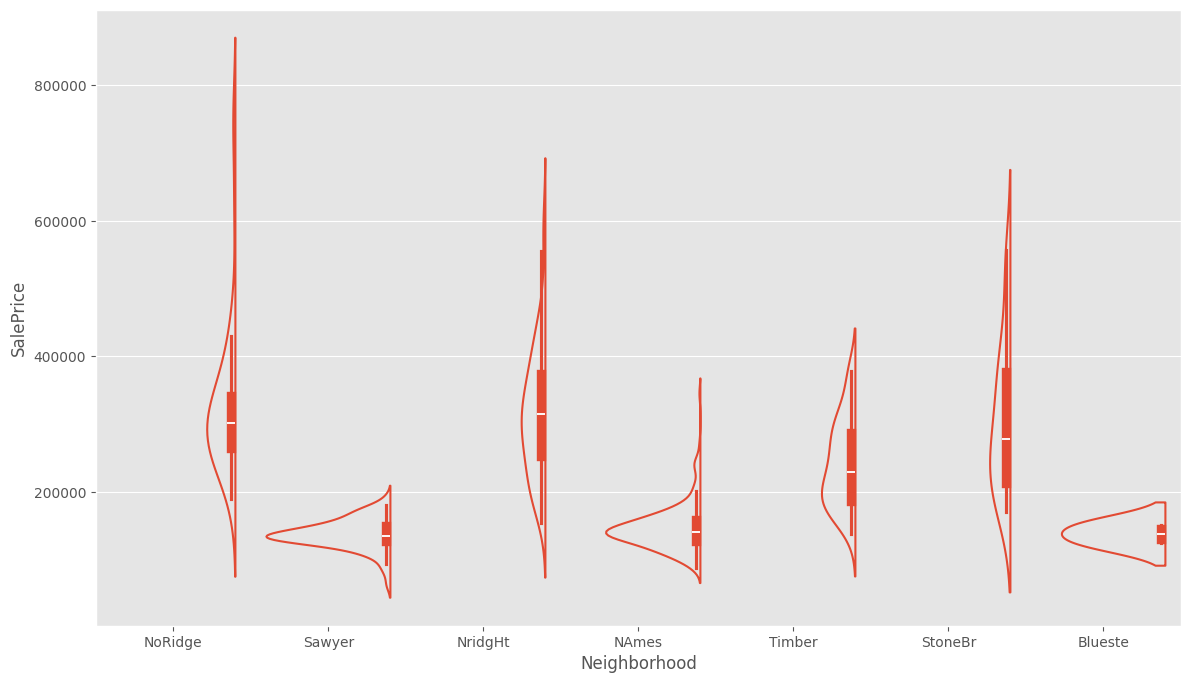

In [88]:
plt.figure(figsize=(14,8))
sns.violinplot(data=df_Neigh_Focus, x='Neighborhood', y='SalePrice', split=True, fill=False)

<Axes: xlabel='SalePrice', ylabel='Count'>

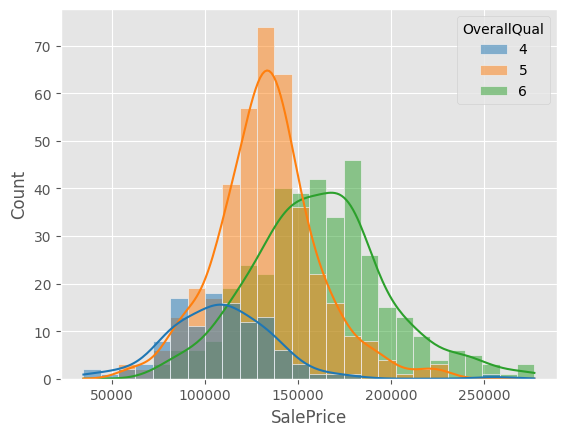

In [91]:
df_qual_456 = df[df['OverallQual'].isin([4,5,6])]
sns.histplot(data=df_qual_456, x='SalePrice', hue='OverallQual', kde=True, palette='tab10')

### Categorical vs Categorical 

In [92]:
Neightborhood_Qual = pd.crosstab(index=df['Neighborhood'], columns=df['OverallQual'])
Neightborhood_Qual

OverallQual,1,2,3,4,5,6,7,8,9,10
Neighborhood,,,,,,,,,,
Blmngtn,0,0,0,0,0,0,14,3,0,0
Blueste,0,0,0,0,0,2,0,0,0,0
BrDale,0,0,0,0,5,11,0,0,0,0
BrkSide,1,1,3,10,21,18,4,0,0,0
ClearCr,0,0,0,3,6,10,9,0,0,0
CollgCr,0,0,0,1,28,24,71,23,3,0
Crawfor,0,0,0,1,11,19,13,7,0,0
Edwards,1,0,5,25,38,23,5,0,1,2
Gilbert,0,0,0,1,3,33,36,5,1,0


- OverallQuality of 10 is rare (Quality of 10 is only in few/select Neighborhoods)
- NAmes has highest medium quality
- Quality 4-7 is where the meat of the data is
- home builders at Edwards tend to build homes with quality between 4 and 6

<Axes: xlabel='Neighborhood'>

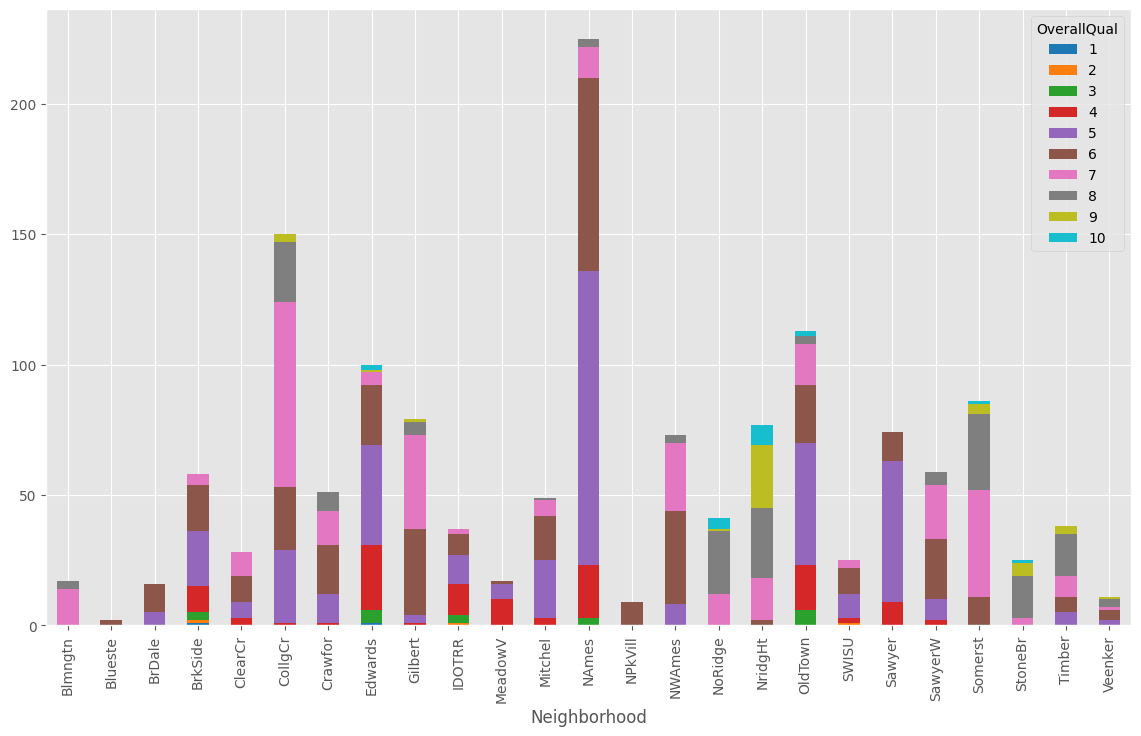

In [101]:
Neightborhood_Qual.plot(kind='bar', stacked=True, figsize=(14,8),colormap='tab10')

The plot above is useful, but limited to information about exact values of each segment.
`plotly` can help us get such values using its interactive hover and show functionality 

`pip install plotly`

If you get an error, run `pip install nbformat` first

In [103]:
import plotly.express as px
import plotly.graph_objects as go

Documentation: https://plotly.com/python/

In [106]:
fig = px.bar(data_frame=Neightborhood_Qual, color='OverallQual')
fig.show()

<Axes: xlabel='YearBuilt', ylabel='SalePrice'>

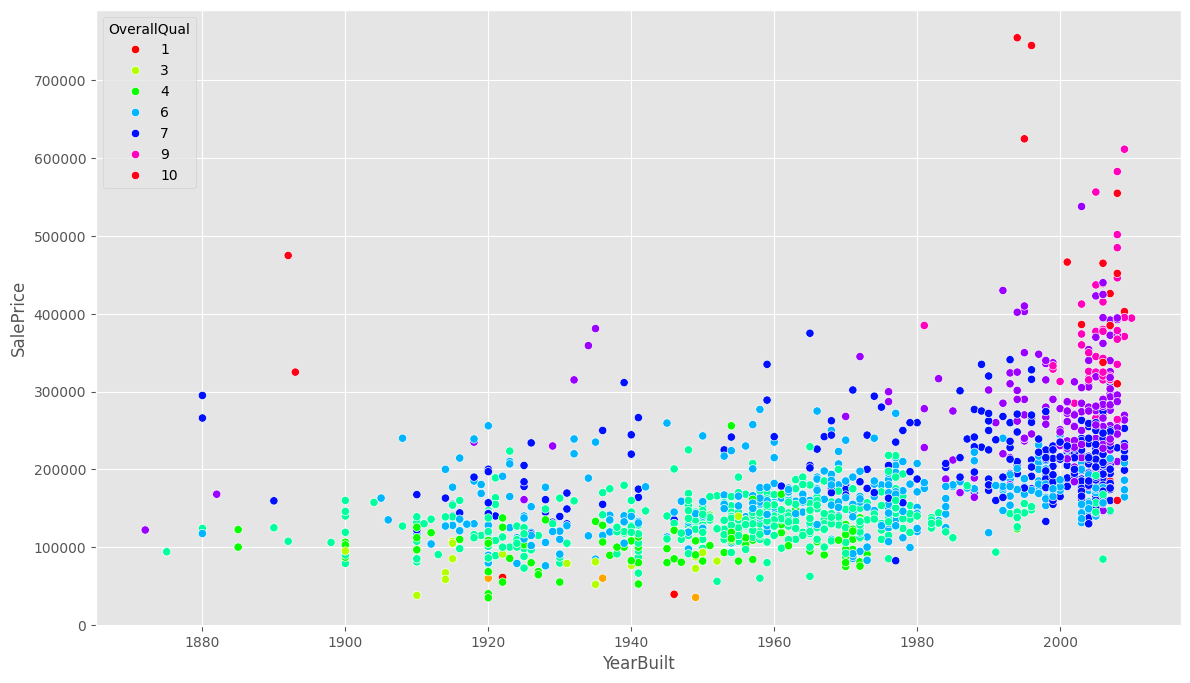

In [111]:
plt.figure(figsize=(14,8))
sns.scatterplot(data=df, x='YearBuilt', y='SalePrice', hue='OverallQual', palette='hsv')

In [117]:
fig = px.scatter(data_frame=df, x='YearBuilt', y='SalePrice', color='OverallQual'
                 , hover_data=['KitchenQual','Neighborhood']
                 , size='GrLivArea')
fig.show()

### Pie and Sunburst Chart

In [120]:
top_6_larg_neighb = df['Neighborhood'].value_counts().head(6).index
top_6_larg_neighb

Index(['NAmes', 'CollgCr', 'OldTown', 'Edwards', 'Somerst', 'Gilbert'], dtype='object', name='Neighborhood')

In [121]:
df_largest_neighborhoods = df[df['Neighborhood'].isin(top_6_larg_neighb)]
df_largest_neighborhoods.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,SC60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,No,No,No,0,Feb,2008,WD,Normal,208500
2,SC60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,No,No,No,0,Sep,2008,WD,Normal,223500
6,SC20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,No,No,No,0,Aug,2007,WD,Normal,307000
8,SC50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,No,No,No,0,Apr,2008,WD,Abnorml,129900
13,SC20,RL,91.0,10652,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,No,No,No,0,Aug,2007,New,Partial,279500


In [122]:
fig = px.pie(data_frame=df_largest_neighborhoods, values='SalePrice', names='Neighborhood', title='Largest Neighborhoods and Total Sale Price')
fig.show()

Building Sunbursts
- Pie charts with additional detail about the hierarchy of multiple components.
- For example, each neighborhood (high level - L1) can have multiple houses with different building types (L2) and quality categories (L3)

In [123]:
fig = px.sunburst(data_frame=df_largest_neighborhoods,
                  path=['Neighborhood', 'BldgType', 'OverallQual'],
                  values='SalePrice',
                  width=900,
                  height=900)
fig.show()